# 🖥️ High Performance Computing (HPC) - Complete University Course

## A Comprehensive Guide to Parallel Programming for Multicore and Cluster Systems

---

**Course Overview:**
This course provides a thorough introduction to High Performance Computing, covering parallel architectures, programming models, and modern accelerator technologies. By the end of this course, you will understand the fundamental principles of parallel computing and be able to write efficient parallel programs.

**Prerequisites:** Basic programming knowledge (C/Python), understanding of computer architecture fundamentals.

**Course Structure:**

- **Chapter I:** Introduction to Parallel Computing
- **Chapter II:** Parallel Programming Models and Interfaces
- **Chapter III:** GPU Computing
- **Chapter IV:** Emerging HPC Technologies

---

**Author:** Based on "Parallel Programming for Multicore and Cluster Systems" by Thomas Rauber & Gudula Rünger


# CHAPTER I: Introduction to Parallel Computing

## Chapitre I : Introduction au calcul parallèle

---

## 1.1 The Need for Parallel Computing (Nécessité du calcul parallèle)

### 1.1.1 Theory: Why Parallel Computing?

**Motivation:**
Parallel programming and the design of efficient parallel programs have been well established in high-performance, scientific computing for many years. The simulation of scientific problems is an important area in natural and engineering sciences of growing importance.

**Key Drivers for Parallel Computing:**

1. **Scientific Simulations**

   - Weather forecasting using complex mathematical models (partial differential equations)
   - Crash simulations in car industry using finite element methods
   - Drug design and molecular dynamics
   - Computer graphics for film and advertising

2. **Hardware Evolution**

   - **Moore's Law**: The number of transistors doubles every 18-24 months
   - Clock speed increases have slowed due to heat dissipation limits
   - **Multicore processors** are now standard (dual-core, quad-core, oct-core)
   - Future processors will have dozens to hundreds of cores

3. **The Multicore Revolution**
   ```
   ┌─────────────────────────────────────────────────────┐
   │           PROCESSOR EVOLUTION                        │
   │                                                       │
   │   1990s: Single Core → 2005: Dual Core              │
   │   2007: Quad Core → 2010+: Many Core                │
   │                                                       │
   │   Why? Physics limitations:                          │
   │   - Power consumption ∝ frequency³                   │
   │   - Heat dissipation limits                          │
   │   - Memory wall problem                              │
   └─────────────────────────────────────────────────────┘
   ```

**The Key Insight:**

> _"Software developers can no longer expect that the increase of computing power can automatically be used by their software products. Instead, additional effort is required at the software level to take advantage of the increased computing power."_

### Applications of Parallel Computing

| Domain     | Application      | Why Parallel?                       |
| ---------- | ---------------- | ----------------------------------- |
| Weather    | Forecasting      | Complex PDEs, real-time constraints |
| Automotive | Crash simulation | Finite element methods              |
| Pharma     | Drug design      | Molecular dynamics                  |
| Finance    | Risk analysis    | Monte Carlo simulations             |
| AI/ML      | Deep learning    | Matrix operations                   |


In [ ]:
# Example 1.1: Demonstrating the need for parallelism
# Sequential vs Parallel computation time estimation

import time
import numpy as np

def sequential_matrix_multiply(A, B):
    """Sequential matrix multiplication - O(n³)"""
    n = len(A)
    C = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

# Simulate computation time for different problem sizes
print("=" * 60)
print("DEMONSTRATION: Why We Need Parallel Computing")
print("=" * 60)

problem_sizes = [100, 200, 400]
for n in problem_sizes:
    # Theoretical sequential time (proportional to n³)
    seq_ops = n ** 3
    # With p processors, ideal parallel time
    p = 4  # 4 cores
    parallel_ops = seq_ops / p
    
    print(f"\nMatrix size: {n}x{n}")
    print(f"  Sequential operations: {seq_ops:,}")
    print(f"  Parallel operations (4 cores): {parallel_ops:,.0f}")
    print(f"  Theoretical speedup: {p}x")

print("\n" + "=" * 60)
print("Key Takeaway: Larger problems benefit more from parallelism!")
print("=" * 60)

DEMONSTRATION: Why We Need Parallel Computing

Matrix size: 100x100
  Sequential operations: 1,000,000
  Parallel operations (4 cores): 250,000
  Theoretical speedup: 4x

Matrix size: 200x200
  Sequential operations: 8,000,000
  Parallel operations (4 cores): 2,000,000
  Theoretical speedup: 4x

Matrix size: 400x400
  Sequential operations: 64,000,000
  Parallel operations (4 cores): 16,000,000
  Theoretical speedup: 4x

Key Takeaway: Larger problems benefit more from parallelism!


## 1.2 Fundamental Laws of Parallel Computing (Lois fondamentales)

### 1.2.1 Basic Concepts and Terminology

**Task Decomposition:**
The design of a parallel algorithm starts with the **decomposition** of computations into several parts called **tasks**, which can be computed in parallel.

```
┌─────────────────────────────────────────────────────────────┐
│                  PARALLELIZATION WORKFLOW                    │
├─────────────────────────────────────────────────────────────┤
│                                                              │
│  Sequential    ┌─────────┐    Parallel                      │
│  Algorithm ───►│DECOMPOSE├───► Tasks ────┐                  │
│                └─────────┘              │                   │
│                                         ▼                   │
│                               ┌─────────────────┐           │
│                               │  SCHEDULING     │           │
│                               │  (assign tasks  │           │
│                               │   to threads)   │           │
│                               └────────┬────────┘           │
│                                        │                    │
│                                        ▼                    │
│                               ┌─────────────────┐           │
│                               │    MAPPING      │           │
│                               │ (threads to     │           │
│                               │  processors)    │           │
│                               └─────────────────┘           │
└─────────────────────────────────────────────────────────────┘
```

**Key Terminology:**

| Term                | Definition                                             |
| ------------------- | ------------------------------------------------------ |
| **Task**            | A computation unit that can be executed independently  |
| **Granularity**     | The size of tasks (fine-grained vs coarse-grained)     |
| **Process**         | An independent control flow with its own address space |
| **Thread**          | A lightweight control flow sharing address space       |
| **Scheduling**      | Assignment of tasks to processes/threads               |
| **Mapping**         | Assignment of processes/threads to physical processors |
| **Synchronization** | Coordination between parallel execution units          |

### 1.2.2 Memory Organization Models

**Two Main Categories:**

1. **Shared Memory** (Mémoire partagée)

   - All processors access a global memory
   - Communication via shared variables
   - Requires synchronization for correct access
   - Examples: Multicore processors, SMP systems

2. **Distributed Memory** (Mémoire distribuée)
   - Each processor has private local memory
   - Communication via message passing
   - No shared memory access
   - Examples: Clusters, supercomputers

```
SHARED MEMORY                    DISTRIBUTED MEMORY

   P₁   P₂   P₃   P₄               P₁   P₂   P₃   P₄
    │    │    │    │                │    │    │    │
    └────┴────┴────┘                M₁   M₂   M₃   M₄
           │                        │    │    │    │
    ┌──────┴──────┐                └────┴────┴────┘
    │   SHARED    │                      │
    │   MEMORY    │              Interconnection Network
    └─────────────┘
```


### 1.2.3 Performance Metrics: Speedup and Efficiency

**Speedup Definition:**

The **speedup** $S_p$ achieved by using $p$ processors is defined as:

$$S_p = \frac{T_1}{T_p}$$

Where:

- $T_1$ = Execution time with 1 processor (sequential)
- $T_p$ = Execution time with $p$ processors

**Properties of Speedup:**

- **Linear speedup**: $S_p = p$ (ideal case)
- **Sublinear speedup**: $S_p < p$ (common case)
- **Superlinear speedup**: $S_p > p$ (rare, usually due to cache effects)

**Efficiency Definition:**

The **efficiency** $E_p$ measures how effectively processors are utilized:

$$E_p = \frac{S_p}{p} = \frac{T_1}{p \cdot T_p}$$

- $E_p = 1$ means 100% efficiency (perfect utilization)
- $E_p < 1$ means some overhead or idle time exists

### 1.2.4 Amdahl's Law (La loi d'Amdahl)

**The Fundamental Limit:**

Amdahl's Law describes the theoretical speedup limit when only a fraction of a program can be parallelized.

$$S_p = \frac{1}{f + \frac{1-f}{p}}$$

Where:

- $f$ = Fraction of the program that is **sequential** (cannot be parallelized)
- $1-f$ = Fraction that can be parallelized
- $p$ = Number of processors

**Maximum Speedup (as p → ∞):**

$$S_{max} = \lim_{p \to \infty} S_p = \frac{1}{f}$$

**Key Insight:**

> Even a small sequential fraction severely limits speedup!
>
> - If 10% is sequential: max speedup = 10x
> - If 5% is sequential: max speedup = 20x
> - If 1% is sequential: max speedup = 100x


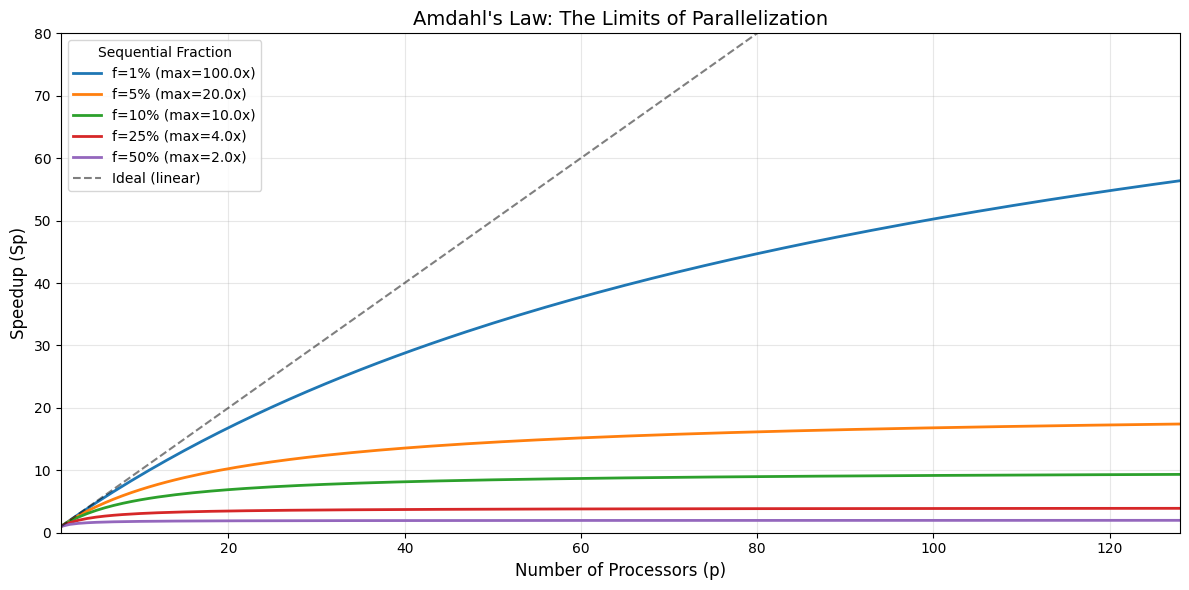


AMDAHL'S LAW SUMMARY TABLE
Processors | f=     1% | f=     5% | f=    10% | f=    25% | f=    50% | 
------------------------------------------------------------
         2 |     1.98 |     1.90 |     1.82 |     1.60 |     1.33 | 
         4 |     3.88 |     3.48 |     3.08 |     2.29 |     1.60 | 
         8 |     7.48 |     5.93 |     4.71 |     2.91 |     1.78 | 
        16 |    13.91 |     9.14 |     6.40 |     3.37 |     1.88 | 
        32 |    24.43 |    12.55 |     7.80 |     3.66 |     1.94 | 
        64 |    39.26 |    15.42 |     8.77 |     3.82 |     1.97 | 
       128 |    56.39 |    17.41 |     9.34 |     3.91 |     1.98 | 


In [ ]:
# Example 1.2: Amdahl's Law Visualization
import numpy as np
import matplotlib.pyplot as plt

def amdahl_speedup(f, p):
    """Calculate speedup according to Amdahl's Law
    
    Args:
        f: Sequential fraction (0 to 1)
        p: Number of processors
    
    Returns:
        Speedup value
    """
    return 1 / (f + (1 - f) / p)

# Different sequential fractions
sequential_fractions = [0.01, 0.05, 0.10, 0.25, 0.50]
processors = np.arange(1, 129)

plt.figure(figsize=(12, 6))

# Plot speedup curves
for f in sequential_fractions:
    speedups = [amdahl_speedup(f, p) for p in processors]
    max_speedup = 1/f if f > 0 else float('inf')
    label = f'f={f:.0%} (max={max_speedup:.1f}x)'
    plt.plot(processors, speedups, label=label, linewidth=2)

# Ideal linear speedup
plt.plot(processors, processors, 'k--', label='Ideal (linear)', linewidth=1.5, alpha=0.5)

plt.xlabel('Number of Processors (p)', fontsize=12)
plt.ylabel('Speedup (Sp)', fontsize=12)
plt.title("Amdahl's Law: The Limits of Parallelization", fontsize=14)
plt.legend(title='Sequential Fraction', loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(1, 128)
plt.ylim(0, 80)

plt.tight_layout()
plt.show()

# Print summary table
print("\n" + "=" * 60)
print("AMDAHL'S LAW SUMMARY TABLE")
print("=" * 60)
print(f"{'Processors':>10} | ", end="")
for f in sequential_fractions:
    print(f"f={f*100:>6.0f}% | ", end="")
print("\n" + "-" * 60)

for p in [2, 4, 8, 16, 32, 64, 128]:
    print(f"{p:>10} | ", end="")
    for f in sequential_fractions:
        s = amdahl_speedup(f, p)
        print(f"{s:>8.2f} | ", end="")
    print()

### 1.2.5 Gustafson's Law (La loi de Gustafson)

**A More Optimistic View:**

While Amdahl's Law assumes a fixed problem size, **Gustafson's Law** (1988) considers that with more processors, we typically solve **larger problems**.

$$S_p = f + (1-f) \cdot p = p - f \cdot (p - 1)$$

Where:

- $f$ = Sequential fraction (measured on the parallel system)
- $p$ = Number of processors

**Key Insight:**

> Gustafson's Law shows that speedup can scale linearly with the number of processors if we scale the problem size accordingly. This is called **weak scaling**.

**Comparison:**

| Aspect       | Amdahl's Law   | Gustafson's Law |
| ------------ | -------------- | --------------- |
| Problem size | Fixed          | Scales with p   |
| Scaling type | Strong scaling | Weak scaling    |
| View         | Pessimistic    | Optimistic      |
| Use case     | Fixed workload | Larger problems |

### 1.2.6 Parallel Execution Time Model

The parallel execution time $T_p$ can be modeled as:

$$T_p = T_{comp} + T_{comm} + T_{idle}$$

Where:

- $T_{comp}$ = Computation time
- $T_{comm}$ = Communication time (data exchange)
- $T_{idle}$ = Idle/waiting time

**Communication Time Model:**

$$T_{comm} = t_s + t_w \cdot m$$

Where:

- $t_s$ = Startup/latency time (fixed overhead)
- $t_w$ = Per-word transfer time (bandwidth-related)
- $m$ = Message size in words


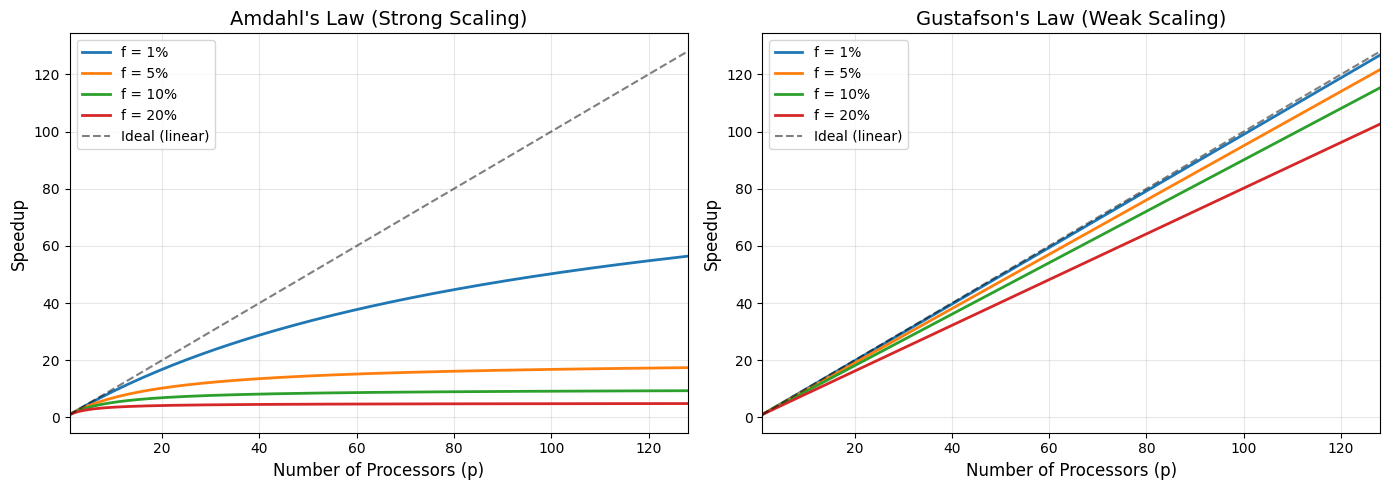


📊 Analysis:
- Amdahl's Law: Speedup is limited by the sequential fraction (asymptotic bound)
- Gustafson's Law: Speedup scales nearly linearly when problem size grows with processors
- Real applications often follow a pattern between these two models


In [ ]:
# Example 1.3: Gustafson's Law vs Amdahl's Law Comparison
import numpy as np
import matplotlib.pyplot as plt

def amdahl_speedup(f, p):
    """Calculate speedup using Amdahl's Law"""
    return 1 / (f + (1 - f) / p)

def gustafson_speedup(f, p):
    """Calculate speedup using Gustafson's Law"""
    return p - f * (p - 1)

# Number of processors
processors = np.arange(1, 129)
sequential_fractions = [0.01, 0.05, 0.10, 0.20]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amdahl's Law
ax1 = axes[0]
for f in sequential_fractions:
    speedups = [amdahl_speedup(f, p) for p in processors]
    ax1.plot(processors, speedups, label=f'f = {f*100:.0f}%', linewidth=2)
ax1.plot(processors, processors, 'k--', label='Ideal (linear)', alpha=0.5)
ax1.set_xlabel('Number of Processors (p)', fontsize=12)
ax1.set_ylabel('Speedup', fontsize=12)
ax1.set_title("Amdahl's Law (Strong Scaling)", fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim([1, 128])

# Gustafson's Law
ax2 = axes[1]
for f in sequential_fractions:
    speedups = [gustafson_speedup(f, p) for p in processors]
    ax2.plot(processors, speedups, label=f'f = {f*100:.0f}%', linewidth=2)
ax2.plot(processors, processors, 'k--', label='Ideal (linear)', alpha=0.5)
ax2.set_xlabel('Number of Processors (p)', fontsize=12)
ax2.set_ylabel('Speedup', fontsize=12)
ax2.set_title("Gustafson's Law (Weak Scaling)", fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim([1, 128])

plt.tight_layout()
plt.savefig('gustafson_vs_amdahl.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Analysis:")
print("- Amdahl's Law: Speedup is limited by the sequential fraction (asymptotic bound)")
print("- Gustafson's Law: Speedup scales nearly linearly when problem size grows with processors")
print("- Real applications often follow a pattern between these two models")

## 1.3 Classification des Architectures Parallèles (Flynn's Taxonomy)

### 1.3.1 La Taxonomie de Flynn

**Michael Flynn** (1966) classified computer architectures based on the number of **instruction streams** and **data streams**:

```
                    ┌─────────────────────────────────────────────────────┐
                    │              DATA STREAMS                           │
                    ├─────────────────────┬───────────────────────────────┤
                    │       Single        │          Multiple             │
┌───────────────────┼─────────────────────┼───────────────────────────────┤
│ INSTRUCTION       │                     │                               │
│ STREAMS           │                     │                               │
├───────────────────┼─────────────────────┼───────────────────────────────┤
│                   │        SISD         │           SIMD                │
│     Single        │  (von Neumann)      │    (Vector processors,        │
│                   │  Traditional CPU    │     GPU shader cores)         │
├───────────────────┼─────────────────────┼───────────────────────────────┤
│                   │        MISD         │           MIMD                │
│    Multiple       │  (Rare, fault       │    (Multiprocessors,          │
│                   │   tolerance)        │     Clusters, Grids)          │
└───────────────────┴─────────────────────┴───────────────────────────────┘
```

### 1.3.2 SISD (Single Instruction, Single Data)

**Definition:** One processor executes one instruction stream operating on one data stream.

**Characteristics:**

- Traditional sequential (von Neumann) architecture
- One instruction at a time
- Can still use instruction pipelining for performance

**Example:** Classical single-core CPU without SIMD extensions

```
┌──────────────────────────────────────┐
│           Control Unit               │
│               │                      │
│               ▼                      │
│    ┌──────────────────┐              │
│    │    Processor     │              │
│    └────────┬─────────┘              │
│             │                        │
│             ▼                        │
│    ┌──────────────────┐              │
│    │      Memory      │              │
│    └──────────────────┘              │
└──────────────────────────────────────┘
    Instruction → Data → Result
```

### 1.3.3 SIMD (Single Instruction, Multiple Data)

**Definition:** One instruction operates simultaneously on multiple data elements.

**Characteristics:**

- All processing units execute the same instruction
- Each unit operates on different data
- Excellent for data parallelism (vectors, matrices, images)
- Synchronous execution

**Examples:**

- **Vector processors** (Cray, NEC SX)
- **GPU shader cores** (NVIDIA CUDA cores, AMD Stream processors)
- **CPU SIMD extensions** (SSE, AVX, NEON)

```
┌─────────────────────────────────────────────────────┐
│              Control Unit (Single Instruction)      │
│                        │                            │
│    ┌───────────────────┼───────────────────┐        │
│    │         │         │         │         │        │
│    ▼         ▼         ▼         ▼         ▼        │
│ ┌─────┐  ┌─────┐  ┌─────┐  ┌─────┐  ┌─────┐        │
│ │ PE₀ │  │ PE₁ │  │ PE₂ │  │ PE₃ │  │ PE₄ │        │
│ └──┬──┘  └──┬──┘  └──┬──┘  └──┬──┘  └──┬──┘        │
│    │        │        │        │        │           │
│    ▼        ▼        ▼        ▼        ▼           │
│ ┌─────┐  ┌─────┐  ┌─────┐  ┌─────┐  ┌─────┐        │
│ │ D₀  │  │ D₁  │  │ D₂  │  │ D₃  │  │ D₄  │        │
│ └─────┘  └─────┘  └─────┘  └─────┘  └─────┘        │
└─────────────────────────────────────────────────────┘
           Same instruction, different data
```

### 1.3.4 MISD (Multiple Instruction, Single Data)

**Definition:** Multiple processors execute different instructions on the same data stream.

**Characteristics:**

- Very rare in practice
- Used mainly for fault tolerance (redundant computation)
- Space shuttle flight control computers

**Note:** MISD has limited practical applications and is mostly of theoretical interest.

### 1.3.5 MIMD (Multiple Instruction, Multiple Data)

**Definition:** Multiple processors execute different instructions on different data.

**Characteristics:**

- Most flexible parallel architecture
- Each processor can run independently
- Can be further classified as:

```
                           MIMD
                             │
             ┌───────────────┴───────────────┐
             │                               │
      Shared Memory                    Distributed Memory
             │                               │
      ┌──────┴──────┐                 ┌──────┴──────┐
      │             │                 │             │
     UMA          NUMA            Clusters      MPP
  (Uniform)    (Non-Uniform)    (Commodity)  (Custom)
```

**MIMD Sub-categories:**

| Type                    | Memory                | Communication   | Examples              |
| ----------------------- | --------------------- | --------------- | --------------------- |
| **Shared Memory (SMP)** | Common address space  | Through memory  | Multi-core CPUs       |
| **Distributed Memory**  | Private per processor | Message passing | Clusters, MPP         |
| **Hybrid**              | Both                  | Both            | Modern supercomputers |


In [ ]:
# Example 1.4: Demonstrating SIMD vs Sequential Processing
import numpy as np
import time

# Create large arrays
size = 10_000_000
a = np.random.rand(size)
b = np.random.rand(size)

# Method 1: Python loop (Sequential - SISD style)
def sequential_add(a, b):
    result = np.empty(len(a))
    for i in range(len(a)):
        result[i] = a[i] + b[i]
    return result

# Method 2: NumPy vectorized (Uses SIMD internally)
def vectorized_add(a, b):
    return a + b

# Benchmark (using smaller array for sequential to save time)
small_size = 100_000
a_small = a[:small_size]
b_small = b[:small_size]

# Sequential timing
start = time.time()
result_seq = sequential_add(a_small, b_small)
seq_time = time.time() - start

# Vectorized timing (on full array)
start = time.time()
result_vec = vectorized_add(a, b)
vec_time = time.time() - start

# Adjusted speedup calculation
vec_time_adjusted = vec_time * (small_size / size)
speedup = seq_time / vec_time_adjusted

print("=" * 60)
print("SIMD vs Sequential Processing Comparison")
print("=" * 60)
print(f"\n📊 Sequential (Python loop) on {small_size:,} elements:")
print(f"   Time: {seq_time*1000:.2f} ms")
print(f"\n⚡ Vectorized (NumPy SIMD) on {size:,} elements:")
print(f"   Time: {vec_time*1000:.2f} ms")
print(f"   Adjusted time for {small_size:,}: {vec_time_adjusted*1000:.4f} ms")
print(f"\n🚀 Estimated Speedup: {speedup:.1f}x")
print(f"\n💡 Explanation:")
print("   NumPy uses optimized BLAS libraries that leverage SIMD")
print("   instructions (SSE, AVX) to process multiple elements")
print("   simultaneously in a single CPU instruction.")

SIMD vs Sequential Processing Comparison

📊 Sequential (Python loop) on 100,000 elements:
   Time: 38.85 ms

⚡ Vectorized (NumPy SIMD) on 10,000,000 elements:
   Time: 35.95 ms
   Adjusted time for 100,000: 0.3595 ms

🚀 Estimated Speedup: 108.1x

💡 Explanation:
   NumPy uses optimized BLAS libraries that leverage SIMD
   instructions (SSE, AVX) to process multiple elements
   simultaneously in a single CPU instruction.


## 1.4 Réseaux d'Interconnexion (Interconnection Networks)

### 1.4.1 Introduction

Interconnection networks enable communication between processors and memory in parallel systems. Their design critically affects performance.

**Key Metrics:**

- **Bandwidth:** Data transfer rate (GB/s)
- **Latency:** Time for message to travel from source to destination
- **Bisection bandwidth:** Minimum bandwidth when network is cut in half
- **Diameter:** Maximum distance between any two nodes
- **Node degree:** Number of links per node

### 1.4.2 Static (Direct) Networks

Processors are directly connected to each other via fixed links.

**Linear Array:**

```
┌───┐   ┌───┐   ┌───┐   ┌───┐   ┌───┐
│ 0 │───│ 1 │───│ 2 │───│ 3 │───│ 4 │
└───┘   └───┘   └───┘   └───┘   └───┘

Diameter: n-1    Node degree: 2
```

**Ring (Torus 1D):**

```
        ┌───────────────────────────┐
        │                           │
      ┌───┐   ┌───┐   ┌───┐   ┌───┐
      │ 0 │───│ 1 │───│ 2 │───│ 3 │
      └───┘   └───┘   └───┘   └───┘
```

**2D Mesh:**

```
┌───┐───┌───┐───┌───┐───┌───┐
│0,0│   │0,1│   │0,2│   │0,3│
└─┬─┘   └─┬─┘   └─┬─┘   └─┬─┘
  │       │       │       │
┌─┴─┐   ┌─┴─┐   ┌─┴─┐   ┌─┴─┐
│1,0│───│1,1│───│1,2│───│1,3│
└─┬─┘   └─┬─┘   └─┬─┘   └─┬─┘
  │       │       │       │
┌─┴─┐   ┌─┴─┐   ┌─┴─┐   ┌─┴─┐
│2,0│───│2,1│───│2,2│───│2,3│
└───┘   └───┘   └───┘   └───┘

Diameter: 2(√n - 1)    Node degree: 4
Used in: Supercomputers, GPU architectures
```

**Hypercube:**

```
Dimension d hypercube: 2^d nodes

d=3 (8 nodes):           Diameter: d = log₂(n)
                         Node degree: d = log₂(n)
    100─────────110
    /│          /│
   / │         / │
  000─────────010│
   │ │         │ │
   │ 101───────│─111
   │ /         │ /
   │/          │/
  001─────────011
```

### 1.4.3 Dynamic (Indirect) Networks

Switches dynamically route messages between processors.

**Bus:**

```
┌─────────────────────────────────────────┐
│               Shared Bus                │
└───┬────────┬────────┬────────┬─────────┘
    │        │        │        │
  ┌─┴─┐    ┌─┴─┐    ┌─┴─┐    ┌─┴─┐
  │P0 │    │P1 │    │P2 │    │P3 │
  └───┘    └───┘    └───┘    └───┘

Simple but limited scalability (contention)
```

**Crossbar:**

```
         M0    M1    M2    M3
         │     │     │     │
    ─────●─────●─────●─────●───── P0
         │     │     │     │
    ─────●─────●─────●─────●───── P1
         │     │     │     │
    ─────●─────●─────●─────●───── P2
         │     │     │     │
    ─────●─────●─────●─────●───── P3

● = Switch point
Full connectivity, non-blocking
Cost: O(n²) switches
```

**Fat Tree (used in InfiniBand):**

```
                 Root
               /      \
              /        \
           Switch    Switch
          /     \    /     \
         /       \  /       \
       S    S    S    S
      /\   /\   /\   /\
     P P  P P  P P  P P

Increased bandwidth toward root
Used in: Data centers, HPC clusters
```

### 1.4.4 Comparison Table

| Network      | Diameter | Node Degree | Cost       | Scalability |
| ------------ | -------- | ----------- | ---------- | ----------- |
| Linear Array | n-1      | 2           | O(n)       | Poor        |
| Ring         | n/2      | 2           | O(n)       | Poor        |
| 2D Mesh      | 2(√n-1)  | 4           | O(n)       | Good        |
| 2D Torus     | √n       | 4           | O(n)       | Good        |
| Hypercube    | log₂n    | log₂n       | O(n log n) | Good        |
| Crossbar     | 1        | n           | O(n²)      | Limited     |
| Fat Tree     | 2 log n  | varies      | O(n log n) | Excellent   |


## 1.5 Cohérence de Cache et Synchronisation

### 1.5.1 Le Problème de Cohérence de Cache

In shared-memory multiprocessors, each processor has its own cache. When multiple caches hold copies of the same memory location, **cache coherence** problems arise.

**Problem Scenario:**

```
Initial state: Memory[X] = 0

Time    P0 (Cache₀)        P1 (Cache₁)        Memory[X]
─────────────────────────────────────────────────────────
t0      Read X             -                  0
        Cache₀[X] = 0
t1      -                  Read X             0
                           Cache₁[X] = 0
t2      Write X = 1        -                  0 (or 1?)
        Cache₀[X] = 1      Cache₁[X] = 0  ← INCOHERENT!
t3      -                  Read X             ???
                           Gets 0 (stale!)
```

### 1.5.2 Cache Coherence Protocols

**MESI Protocol** (Most common):

Each cache line has a state:

- **M (Modified):** Line is dirty, only in this cache
- **E (Exclusive):** Line is clean, only in this cache
- **S (Shared):** Line may be in other caches
- **I (Invalid):** Line is not valid

```
State Transitions:

        ┌────────────────────────────────┐
        │                                │
        ▼                                │
    ┌───────┐   Read Hit      ┌───────┐  │
    │   I   │ ───────────────→│   S   │──┘
    │Invalid│                 │Shared │
    └───┬───┘                 └───┬───┘
        │                         │
        │ Read Miss               │ Write
        │ (no other copy)         │
        ▼                         ▼
    ┌───────┐   Write        ┌───────┐
    │   E   │───────────────→│   M   │
    │Exclus.│                │Modified│
    └───────┘                └───────┘
```

### 1.5.3 False Sharing

**Definition:** When two processors access different variables that reside in the same cache line, causing unnecessary coherence traffic.

```
┌─────────────────────────────────────┐
│         Cache Line (64 bytes)       │
│  ┌───────────┐    ┌───────────┐     │
│  │ Thread 0's│    │ Thread 1's│     │
│  │  Variable │    │  Variable │     │
│  └───────────┘    └───────────┘     │
└─────────────────────────────────────┘
         ↑                ↑
    P0 writes        P1 writes
         ↓                ↓
  Entire line is     Line invalidated
  invalidated in     → refetch needed
  P1's cache
```

**Solution:** Pad data structures to avoid sharing cache lines:

```c
// Bad: Variables in same cache line
int counter0;  // Thread 0
int counter1;  // Thread 1

// Good: Each variable in its own cache line
struct aligned_counter {
    int value;
    char padding[60];  // Assuming 64-byte cache line
};
```

### 1.5.4 Synchronization Primitives

**Mutex (Mutual Exclusion):**

```
Thread 0                    Thread 1
─────────                   ─────────
lock(mutex)                 lock(mutex)
  critical section            ← blocks (waits)
unlock(mutex)
                             critical section
                            unlock(mutex)
```

**Barrier:**

```
Thread 0    Thread 1    Thread 2    Thread 3
────────    ────────    ────────    ────────
work()      work()      work()      work()
   │           │           │           │
   │           │           │           │
   ▼           ▼           ▼           ▼
╔══════════════════════════════════════════╗
║           BARRIER (all must arrive)      ║
╚══════════════════════════════════════════╝
   │           │           │           │
   ▼           ▼           ▼           ▼
next()      next()      next()      next()
```

**Atomic Operations:**

- Compare-and-Swap (CAS)
- Test-and-Set
- Fetch-and-Add

These are hardware-supported operations that complete without interruption.


In [ ]:
# Example 1.5: Demonstrating the Impact of False Sharing
import numpy as np
import threading
import time

def demonstrate_false_sharing():
    """Compare performance with and without false sharing"""
    
    iterations = 10_000_000
    num_threads = 4
    
    # Scenario 1: Counters in same array (potential false sharing)
    shared_counters = np.zeros(num_threads, dtype=np.int64)
    
    # Scenario 2: Counters with padding (each in separate cache line)
    # Assuming 64-byte cache lines, int64 = 8 bytes, so pad with 7 more int64s
    padded_counters = np.zeros(num_threads * 8, dtype=np.int64)
    
    def increment_shared(thread_id, counts):
        for _ in range(iterations):
            counts[thread_id] += 1
    
    def increment_padded(thread_id, counts):
        idx = thread_id * 8  # Each counter separated by 64 bytes
        for _ in range(iterations):
            counts[idx] += 1
    
    # Test 1: With potential false sharing
    threads = []
    start = time.time()
    for i in range(num_threads):
        t = threading.Thread(target=increment_shared, args=(i, shared_counters))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
    time_shared = time.time() - start
    
    # Test 2: With padding to avoid false sharing
    threads = []
    start = time.time()
    for i in range(num_threads):
        t = threading.Thread(target=increment_padded, args=(i, padded_counters))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
    time_padded = time.time() - start
    
    print("=" * 60)
    print("False Sharing Demonstration")
    print("=" * 60)
    print(f"\n📊 Configuration:")
    print(f"   - {num_threads} threads")
    print(f"   - {iterations:,} iterations per thread")
    print(f"\n⏱️ Results:")
    print(f"   Contiguous counters (false sharing possible): {time_shared:.3f}s")
    print(f"   Padded counters (no false sharing):           {time_padded:.3f}s")
    
    if time_shared > time_padded:
        speedup = time_shared / time_padded
        print(f"\n   📈 Padding speedup: {speedup:.2f}x")
    else:
        print(f"\n   Note: Python's GIL may mask the effect.")
        print(f"   In C/C++, the difference can be 10-100x!")
    
    print(f"\n💡 Note: Due to Python's GIL (Global Interpreter Lock),")
    print(f"   true parallelism is limited. In native code (C/C++),")
    print(f"   false sharing effects are much more pronounced.")

demonstrate_false_sharing()

False Sharing Demonstration

📊 Configuration:
   - 4 threads
   - 10,000,000 iterations per thread

⏱️ Results:
   Contiguous counters (false sharing possible): 15.667s
   Padded counters (no false sharing):           14.789s

   📈 Padding speedup: 1.06x

💡 Note: Due to Python's GIL (Global Interpreter Lock),
   true parallelism is limited. In native code (C/C++),
   false sharing effects are much more pronounced.


## 📝 Exercices du Chapitre I

### Niveau Facile ⭐

**Exercice 1.1:** Define the following terms:

- Speedup
- Efficiency
- Scalability
- Latency vs Bandwidth

**Exercice 1.2:** A program has 80% parallelizable code. Using Amdahl's Law:
a) What is the maximum speedup with 4 processors?
b) What is the maximum speedup with infinite processors?
c) What is the efficiency with 8 processors?

**Exercice 1.3:** Classify the following systems according to Flynn's taxonomy:

- A modern smartphone CPU
- A graphics card (GPU)
- A traditional calculator
- A distributed web server farm

---

### Niveau Moyen ⭐⭐

**Exercice 1.4:** Given a parallel program with:

- Sequential time: $T_1 = 100$ seconds
- Time with 4 processors: $T_4 = 30$ seconds

a) Calculate the speedup $S_4$
b) Calculate the efficiency $E_4$
c) Estimate the sequential fraction using Amdahl's Law
d) Predict $T_8$ and $T_{16}$

**Exercice 1.5:** Compare the following interconnection networks for a 64-node system:

- 2D Mesh (8×8)
- 3D Hypercube (6 dimensions)
- Fat Tree

Calculate: diameter, node degree, and discuss trade-offs.

**Exercice 1.6:** Explain the MESI cache coherence protocol. Trace the state transitions for:

1. P0 reads address X (not in any cache)
2. P1 reads address X
3. P0 writes to X
4. P1 reads X again

---

### Niveau Difficile ⭐⭐⭐

**Exercice 1.7 (Analysis):** A scientific simulation runs on a cluster with:

- Computation time: $T_{comp} = 10p^{-0.9}$ seconds (p = processors)
- Communication time: $T_{comm} = 0.1p \log p$ seconds

a) Derive the total parallel time $T_p$
b) Find the optimal number of processors
c) Calculate the isoefficiency function

**Exercice 1.8 (Design):** Design an interconnection network for a 1024-node system that:

- Has diameter ≤ 10
- Has node degree ≤ 6
- Supports at least 100 GB/s bisection bandwidth

Justify your design choices.

**Exercice 1.9 (Implementation):** Write a program that:

- Creates an array of 10 million random numbers
- Sorts it using parallel merge sort (conceptually)
- Measures and compares speedup with 1, 2, 4, 8 threads
- Discusses the deviation from ideal speedup


### 📋 Solutions des Exercices du Chapitre I

<details>
<summary><b>Solution Exercice 1.2</b> (Click to expand)</summary>

Given: $f = 0.20$ (20% sequential), $(1-f) = 0.80$ (80% parallel)

**a) Speedup with 4 processors:**
$$S_4 = \frac{1}{f + \frac{1-f}{p}} = \frac{1}{0.20 + \frac{0.80}{4}} = \frac{1}{0.20 + 0.20} = \frac{1}{0.40} = 2.5$$

**b) Maximum speedup (p → ∞):**
$$S_\infty = \lim_{p \to \infty} \frac{1}{f + \frac{1-f}{p}} = \frac{1}{f} = \frac{1}{0.20} = 5$$

**c) Efficiency with 8 processors:**
$$S_8 = \frac{1}{0.20 + \frac{0.80}{8}} = \frac{1}{0.30} = 3.33$$
$$E_8 = \frac{S_8}{p} = \frac{3.33}{8} = 41.7\%$$

</details>

<details>
<summary><b>Solution Exercice 1.4</b> (Click to expand)</summary>

Given: $T_1 = 100s$, $T_4 = 30s$

**a) Speedup:**
$$S_4 = \frac{T_1}{T_4} = \frac{100}{30} = 3.33$$

**b) Efficiency:**
$$E_4 = \frac{S_4}{4} = \frac{3.33}{4} = 83.3\%$$

**c) Sequential fraction (using Amdahl):**
From $S_p = \frac{1}{f + \frac{1-f}{p}}$, we solve for $f$:
$$3.33 = \frac{1}{f + \frac{1-f}{4}}$$
$$f + \frac{1-f}{4} = 0.30$$
$$4f + 1 - f = 1.20$$
$$3f = 0.20$$
$$f = 0.067 \approx 6.7\%$$

**d) Predictions:**
$$T_8 = \frac{T_1}{S_8} = \frac{100}{\frac{1}{0.067 + \frac{0.933}{8}}} = \frac{100}{5.71} \approx 17.5s$$
$$T_{16} = \frac{100}{\frac{1}{0.067 + \frac{0.933}{16}}} \approx 10.7s$$

</details>

<details>
<summary><b>Solution Exercice 1.6 - MESI Trace</b> (Click to expand)</summary>

| Step | Action        | P0 Cache | P1 Cache | Memory | Bus Activity |
| ---- | ------------- | -------- | -------- | ------ | ------------ |
| 0    | Initial       | -        | -        | X=0    | -            |
| 1    | P0 reads X    | E(X=0)   | -        | X=0    | BusRd        |
| 2    | P1 reads X    | S(X=0)   | S(X=0)   | X=0    | BusRd, P0→S  |
| 3    | P0 writes X=1 | M(X=1)   | I        | X=0    | BusRdX, Inv  |
| 4    | P1 reads X    | S(X=1)   | S(X=1)   | X=1    | BusRd, WB    |

**Explanation:**

1. P0 reads X: Line goes to Exclusive (only copy)
2. P1 reads X: Both caches now Shared
3. P0 writes: P0 invalidates P1's copy, goes to Modified
4. P1 reads: P0 writes back, both go to Shared

</details>


---
# Chapitre II: Modèles de Programmation Parallèle
## (MPI, OpenMP, Pthreads)
---

## 2.1 Introduction aux Paradigmes de Programmation Parallèle

### 2.1.1 Overview of Parallel Programming Models

Parallel programming models provide abstractions for writing programs that can execute concurrently. The choice of model depends on:

- **Hardware architecture** (shared vs distributed memory)
- **Problem characteristics** (data vs task parallelism)
- **Performance requirements**
- **Development effort**

```
┌─────────────────────────────────────────────────────────────────────┐
│                PARALLEL PROGRAMMING MODELS                          │
├─────────────────────────────────────────────────────────────────────┤
│                                                                      │
│   ┌─────────────────┐     ┌─────────────────┐     ┌──────────────┐  │
│   │  SHARED MEMORY  │     │    MESSAGE      │     │    HYBRID    │  │
│   │                 │     │    PASSING      │     │              │  │
│   ├─────────────────┤     ├─────────────────┤     ├──────────────┤  │
│   │ • OpenMP        │     │ • MPI           │     │ • MPI+OpenMP │  │
│   │ • Pthreads      │     │ • PVM           │     │ • MPI+CUDA   │  │
│   │ • Java Threads  │     │ • Chapel        │     │ • OpenMP+GPU │  │
│   │ • TBB           │     │ • UPC           │     │              │  │
│   └─────────────────┘     └─────────────────┘     └──────────────┘  │
│          │                       │                       │          │
│          ▼                       ▼                       ▼          │
│   ┌─────────────────┐     ┌─────────────────┐     ┌──────────────┐  │
│   │  Best for:      │     │  Best for:      │     │  Best for:   │  │
│   │  Multi-core     │     │  Clusters,      │     │  Modern HPC  │  │
│   │  SMP systems    │     │  Distributed    │     │  systems     │  │
│   └─────────────────┘     └─────────────────┘     └──────────────┘  │
└─────────────────────────────────────────────────────────────────────┘
```

### 2.1.2 Key Concepts

**Data Parallelism:**

- Same operation applied to different data elements
- Natural fit for SIMD architectures
- Example: Vector addition, matrix operations

**Task Parallelism:**

- Different operations executed concurrently
- Natural fit for MIMD architectures
- Example: Pipeline processing, master-worker patterns

**Decomposition Strategies:**

| Strategy               | Description                   | Best For                 |
| ---------------------- | ----------------------------- | ------------------------ |
| **Data decomposition** | Divide data among processors  | Regular computations     |
| **Task decomposition** | Divide tasks among processors | Irregular problems       |
| **Pipeline**           | Chain of processing stages    | Streaming data           |
| **Recursive**          | Divide-and-conquer            | Tree-structured problems |


## 2.2 MPI - Message Passing Interface

### 2.2.1 Introduction to MPI

**MPI** is the de facto standard for distributed-memory parallel programming. It provides:

- **Portable** message-passing standard
- **Scalable** to thousands of processes
- **Rich** set of communication primitives
- Support for both **point-to-point** and **collective** communication

```
┌──────────────────────────────────────────────────────────────────┐
│                    MPI Programming Model                          │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Process 0          Process 1          Process 2         ...    │
│   ┌────────┐         ┌────────┐         ┌────────┐              │
│   │ Memory │         │ Memory │         │ Memory │              │
│   │  (M0)  │         │  (M1)  │         │  (M2)  │              │
│   └───┬────┘         └───┬────┘         └───┬────┘              │
│       │                  │                  │                    │
│       └──────────────────┼──────────────────┘                    │
│                          │                                       │
│              ┌───────────┴───────────┐                           │
│              │  NETWORK (Messages)   │                           │
│              │  Send/Receive/Bcast   │                           │
│              └───────────────────────┘                           │
│                                                                   │
│   Key: Each process has PRIVATE memory                           │
│        Communication through EXPLICIT message passing            │
└──────────────────────────────────────────────────────────────────┘
```

### 2.2.2 MPI Basic Concepts

**Key Terms:**

- **Communicator:** Group of processes that can communicate (e.g., MPI_COMM_WORLD)
- **Rank:** Unique identifier of a process within a communicator (0 to size-1)
- **Size:** Number of processes in a communicator
- **Tag:** Message identifier for matching sends and receives

### 2.2.3 Essential MPI Functions

```c
// Initialize MPI
MPI_Init(&argc, &argv);

// Get process rank
int rank;
MPI_Comm_rank(MPI_COMM_WORLD, &rank);

// Get total number of processes
int size;
MPI_Comm_size(MPI_COMM_WORLD, &size);

// Finalize MPI
MPI_Finalize();

```

**python (mpi4py) Equivalent:**

```python
from mpi4py import MPI

# Initialize MPI (automatic in mpi4py)
comm = MPI.COMM_WORLD

# Get process rank
rank = comm.Get_rank()

# Get total number of processes
size = comm.Get_size()

# Finalize MPI (automatic in mpi4py)


### 2.2.4 Point-to-Point Communication
```

**Blocking Communication:**

```c
// Send data
MPI_Send(
    void* buffer,          // Data to send
    int count,             // Number of elements
    MPI_Datatype datatype, // Type (MPI_INT, MPI_DOUBLE, etc.)
    int dest,              // Destination rank
    int tag,               // Message tag
    MPI_Comm comm          // Communicator
);

// Receive data
MPI_Recv(
    void* buffer,          // Buffer to receive into
    int count,             // Max elements to receive
    MPI_Datatype datatype, // Type
    int source,            // Source rank (or MPI_ANY_SOURCE)
    int tag,               // Tag (or MPI_ANY_TAG)
    MPI_Comm comm,         // Communicator
    MPI_Status* status     // Status information
);
```

**python (mpi4py) Equivalent:**

```python
# Send data
comm.Send(
    buf,           # Data to send (numpy array or buffer)
    dest=rank,     # Destination rank
    tag=0          # Message tag
)

# Receive data
comm.Recv(
    buf,           # Buffer to receive into (numpy array)
    source=rank,   # Source rank (or MPI.ANY_SOURCE)
    tag=0          # Tag (or MPI.ANY_TAG)
)
```

**Example: Simple Send/Receive**

```c
if (rank == 0) {
    int data = 42;
    MPI_Send(&data, 1, MPI_INT, 1, 0, MPI_COMM_WORLD);
    printf("Process 0 sent: %d\n", data);
} else if (rank == 1) {
    int data;
    MPI_Recv(&data, 1, MPI_INT, 0, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
    printf("Process 1 received: %d\n", data);
}
```

### 2.2.5 Collective Communication

Collective operations involve ALL processes in a communicator.

```
┌──────────────────────────────────────────────────────────────────┐
│                 COLLECTIVE OPERATIONS                             │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│  MPI_Bcast (Broadcast)           MPI_Scatter                     │
│  ┌───┐                           ┌───┐                           │
│  │ A │ P0                        │ABC│ P0                        │
│  └─┬─┘                           └─┬─┘                           │
│    ├────┬────┬────┐                ├────┬────┐                   │
│    ▼    ▼    ▼    ▼                ▼    ▼    ▼                   │
│  ┌───┐┌───┐┌───┐┌───┐           ┌───┐┌───┐┌───┐                 │
│  │ A ││ A ││ A ││ A │           │ A ││ B ││ C │                 │
│  └───┘└───┘└───┘└───┘           └───┘└───┘└───┘                 │
│   P0   P1   P2   P3              P0   P1   P2                    │
│                                                                   │
│  MPI_Gather                      MPI_Reduce                      │
│  ┌───┐┌───┐┌───┐                ┌───┐┌───┐┌───┐                 │
│  │ A ││ B ││ C │                │ 1 ││ 2 ││ 3 │                 │
│  └─┬─┘└─┬─┘└─┬─┘                └─┬─┘└─┬─┘└─┬─┘                 │
│    └────┼────┘                    └────┼────┘                    │
│         ▼                              ▼                         │
│       ┌───┐                          ┌───┐                       │
│       │ABC│ P0 (root)                │ 6 │ P0 (sum)              │
│       └───┘                          └───┘                       │
│                                                                   │
│  MPI_Allreduce                   MPI_Alltoall                    │
│  ┌───┐┌───┐┌───┐                ┌────┐ ┌────┐ ┌────┐            │
│  │ 1 ││ 2 ││ 3 │                │a₀a₁│ │b₀b₁│ │c₀c₁│            │
│  └─┬─┘└─┬─┘└─┬─┘                └──┬─┘ └──┬─┘ └──┬─┘            │
│    └────┼────┘                     └──────┼──────┘               │
│    ┌────┼────┐                     ┌──────┼──────┐               │
│    ▼    ▼    ▼                     ▼      ▼      ▼               │
│  ┌───┐┌───┐┌───┐                ┌────┐ ┌────┐ ┌────┐            │
│  │ 6 ││ 6 ││ 6 │                │a₀b₀│ │a₁b₁│ │c₀c₁│            │
│  └───┘└───┘└───┘                └────┘ └────┘ └────┘            │
│   All have result!               Transpose pattern               │
└──────────────────────────────────────────────────────────────────┘
```

**Common Collective Functions:**

| Function        | Description               |
| --------------- | ------------------------- |
| `MPI_Bcast`     | One-to-all broadcast      |
| `MPI_Scatter`   | Distribute data from root |
| `MPI_Gather`    | Collect data to root      |
| `MPI_Allgather` | Gather + Broadcast        |
| `MPI_Reduce`    | Combine with operation    |
| `MPI_Allreduce` | Reduce + Broadcast        |
| `MPI_Barrier`   | Synchronization point     |


In [ ]:
# Example 2.1: MPI Concepts with mpi4py
# Note: This demonstrates MPI concepts. Run with: mpirun -np 4 python script.py

# First, let's simulate MPI behavior for demonstration
# In real usage, you would use mpi4py

def simulate_mpi_demo():
    """Demonstrate MPI concepts in a simulated environment"""
    
    # Simulated MPI environment
    class SimulatedMPI:
        def __init__(self, size=4):
            self.size = size
            self.data = {}  # Simulated distributed memory
            
        def broadcast(self, data, root=0):
            """Simulate MPI_Bcast"""
            result = {rank: data for rank in range(self.size)}
            return result
        
        def scatter(self, data, root=0):
            """Simulate MPI_Scatter"""
            chunk_size = len(data) // self.size
            result = {}
            for rank in range(self.size):
                start = rank * chunk_size
                end = start + chunk_size
                result[rank] = data[start:end]
            return result
        
        def gather(self, data_dict, root=0):
            """Simulate MPI_Gather"""
            result = []
            for rank in range(self.size):
                result.extend(data_dict[rank])
            return result
        
        def reduce(self, data_dict, op='sum', root=0):
            """Simulate MPI_Reduce"""
            values = list(data_dict.values())
            if op == 'sum':
                return sum(values)
            elif op == 'max':
                return max(values)
            elif op == 'min':
                return min(values)
    
    # Demonstration
    mpi = SimulatedMPI(size=4)
    
    print("=" * 60)
    print("MPI Collective Operations Demonstration")
    print("=" * 60)
    
    # Broadcast
    print("\n📢 MPI_Bcast (Broadcast):")
    data_to_broadcast = [1, 2, 3, 4]
    broadcast_result = mpi.broadcast(data_to_broadcast, root=0)
    print(f"   Root (rank 0) has: {data_to_broadcast}")
    print(f"   After broadcast:")
    for rank, data in broadcast_result.items():
        print(f"     Rank {rank}: {data}")
    
    # Scatter
    print("\n📤 MPI_Scatter:")
    data_to_scatter = list(range(20))  # [0, 1, 2, ..., 19]
    scatter_result = mpi.scatter(data_to_scatter, root=0)
    print(f"   Root has: {data_to_scatter[:10]}...")
    print(f"   After scatter:")
    for rank, data in scatter_result.items():
        print(f"     Rank {rank}: {data}")
    
    # Gather
    print("\n📥 MPI_Gather:")
    local_data = {
        0: [0, 1],
        1: [10, 11],
        2: [20, 21],
        3: [30, 31]
    }
    print(f"   Each process has local data:")
    for rank, data in local_data.items():
        print(f"     Rank {rank}: {data}")
    gathered = mpi.gather(local_data, root=0)
    print(f"   After gather at root: {gathered}")
    
    # Reduce
    print("\n🔢 MPI_Reduce (sum):")
    local_sums = {0: 10, 1: 20, 2: 30, 3: 40}
    print(f"   Local partial sums:")
    for rank, val in local_sums.items():
        print(f"     Rank {rank}: {val}")
    total = mpi.reduce(local_sums, op='sum', root=0)
    print(f"   Reduced sum at root: {total}")

simulate_mpi_demo()

print("\n" + "=" * 60)
print("💡 Real MPI Code Example (mpi4py):")
print("=" * 60)
print("""
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    data = {'key': 'value', 'numbers': [1, 2, 3]}
else:
    data = None

# Broadcast data from rank 0 to all processes
data = comm.bcast(data, root=0)
print(f"Rank {rank} received: {data}")
""")

MPI Collective Operations Demonstration

📢 MPI_Bcast (Broadcast):
   Root (rank 0) has: [1, 2, 3, 4]
   After broadcast:
     Rank 0: [1, 2, 3, 4]
     Rank 1: [1, 2, 3, 4]
     Rank 2: [1, 2, 3, 4]
     Rank 3: [1, 2, 3, 4]

📤 MPI_Scatter:
   Root has: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...
   After scatter:
     Rank 0: [0, 1, 2, 3, 4]
     Rank 1: [5, 6, 7, 8, 9]
     Rank 2: [10, 11, 12, 13, 14]
     Rank 3: [15, 16, 17, 18, 19]

📥 MPI_Gather:
   Each process has local data:
     Rank 0: [0, 1]
     Rank 1: [10, 11]
     Rank 2: [20, 21]
     Rank 3: [30, 31]
   After gather at root: [0, 1, 10, 11, 20, 21, 30, 31]

🔢 MPI_Reduce (sum):
   Local partial sums:
     Rank 0: 10
     Rank 1: 20
     Rank 2: 30
     Rank 3: 40
   Reduced sum at root: 100

💡 Real MPI Code Example (mpi4py):

from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    data = {'key': 'value', 'numbers': [1, 2, 3]}
else:
    data = None

# Broadcast data from rank 

### 2.2.6 MPI Complete Example: Parallel Sum

```c
// parallel_sum.c - Compute sum of array in parallel
#include <stdio.h>
#include <stdlib.h>
#include <mpi.h>

int main(int argc, char* argv[]) {
    int rank, size;
    int n = 1000000;  // Total array size

    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    // Calculate local array size
    int local_n = n / size;
    double* local_array = malloc(local_n * sizeof(double));

    // Initialize local portion (in real app, might scatter from root)
    for (int i = 0; i < local_n; i++) {
        local_array[i] = rank * local_n + i + 1;  // Values: 1, 2, ..., n
    }

    // Compute local sum
    double local_sum = 0.0;
    for (int i = 0; i < local_n; i++) {
        local_sum += local_array[i];
    }

    // Reduce all local sums to global sum at root
    double global_sum;
    MPI_Reduce(&local_sum, &global_sum, 1, MPI_DOUBLE,
               MPI_SUM, 0, MPI_COMM_WORLD);

    if (rank == 0) {
        printf("Global sum: %.0f\n", global_sum);
        printf("Expected: %.0f\n", (double)n * (n + 1) / 2);
    }

    free(local_array);
    MPI_Finalize();
    return 0;
}

// Compile: mpicc -o parallel_sum parallel_sum.c
// Run: mpirun -np 4 ./parallel_sum
```

**python (mpi4py) Equivalent:**

```python
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

n = 1000000  # Total array size

# Calculate local array size
local_n = n // size
local_array = np.arange(rank * local_n + 1, (rank + 1) * local_n + 1, dtype=np.float64)

# Compute local sum
local_sum = np.sum(local_array)

# Reduce all local sums to global sum at root
global_sum = comm.reduce(local_sum, op=MPI.SUM, root=0)

if rank == 0:
    print(f"Global sum: {global_sum:.0f}")
    print(f"Expected: {n * (n + 1) / 2:.0f}")
```

### 2.2.7 Non-Blocking Communication

For overlapping computation and communication:

```c
MPI_Request request;

// Initiate non-blocking send
MPI_Isend(buffer, count, datatype, dest, tag, comm, &request);

// Do other work while message is being sent
do_computation();

// Wait for send to complete
MPI_Wait(&request, &status);

// Or test if complete without blocking
int flag;
MPI_Test(&request, &flag, &status);
```

**Advantage:** Allows hiding communication latency behind computation.


## 2.3 OpenMP - Open Multi-Processing

### 2.3.1 Introduction to OpenMP

**OpenMP** is a portable API for shared-memory parallel programming. It uses:

- **Compiler directives** (pragmas)
- **Library routines**
- **Environment variables**

```
┌──────────────────────────────────────────────────────────────────┐
│                    OpenMP Programming Model                       │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│          ┌─────────────────────────────────────────┐             │
│          │         SHARED MEMORY                    │             │
│          │   (All threads can access)              │             │
│          └───────────────┬─────────────────────────┘             │
│                          │                                       │
│       ┌──────────────────┼──────────────────────┐               │
│       │         │        │        │             │               │
│    ┌──┴──┐  ┌──┴──┐  ┌──┴──┐  ┌──┴──┐     ┌──┴──┐             │
│    │ T0  │  │ T1  │  │ T2  │  │ T3  │ ... │ Tn  │             │
│    │     │  │     │  │     │  │     │     │     │             │
│    │Local│  │Local│  │Local│  │Local│     │Local│             │
│    │Stack│  │Stack│  │Stack│  │Stack│     │Stack│             │
│    └─────┘  └─────┘  └─────┘  └─────┘     └─────┘             │
│                                                                   │
│    Key: Fork-Join Model                                          │
│    - Master thread spawns team of threads                        │
│    - Threads execute in parallel                                 │
│    - Join back to master at end of parallel region               │
└──────────────────────────────────────────────────────────────────┘
```

### 2.3.2 Fork-Join Execution Model

```
                      Sequential
        ─────────────────────────────────────────────────►
                          │
                          │ #pragma omp parallel
                          │
        ══════════════════╪══════════════════════════════
                          │
              ┌───────────┼───────────┐
              │           │           │
              ▼           ▼           ▼
           Thread 0   Thread 1   Thread 2   Thread 3
              │           │           │           │
              │  Parallel Region (Fork)          │
              │           │           │           │
              └───────────┼───────────┘           │
                          │                       │
        ══════════════════╪═══════════════════════╪══════
                          │ Barrier (Join)
                          ▼
                      Sequential
```

### 2.3.3 Basic OpenMP Constructs

**Parallel Region:**

```c
#pragma omp parallel
{
    // This code runs on all threads
    int tid = omp_get_thread_num();
    printf("Hello from thread %d\n", tid);
}
```

**Parallel For Loop:**

```c
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    a[i] = b[i] + c[i];  // Iterations distributed among threads
}
```

**Data Sharing Clauses:**

| Clause              | Behavior                            |
| ------------------- | ----------------------------------- |
| `shared(var)`       | All threads share the same variable |
| `private(var)`      | Each thread has its own copy        |
| `firstprivate(var)` | Private, initialized from master    |
| `lastprivate(var)`  | Private, last value copied back     |
| `reduction(op:var)` | Private copies combined at end      |

### 2.3.4 Reduction Operations

```c
int sum = 0;
#pragma omp parallel for reduction(+:sum)
for (int i = 0; i < N; i++) {
    sum += a[i];
}
// sum now contains total

// Supported operations: +, *, -, &, |, ^, &&, ||, max, min
```

### 2.3.5 Synchronization

**Critical Section:**

```c
#pragma omp critical
{
    // Only one thread at a time
    shared_counter++;
}
```

**Atomic Operation:**

```c
#pragma omp atomic
counter++;  // Hardware-level atomic update
```

**Barrier:**

```c
#pragma omp parallel
{
    phase1();
    #pragma omp barrier  // All threads wait here
    phase2();
}
```

### 2.3.6 Work Sharing Constructs

```c
#pragma omp parallel
{
    #pragma omp sections
    {
        #pragma omp section
        { task_A(); }

        #pragma omp section
        { task_B(); }

        #pragma omp section
        { task_C(); }
    }
}
```


In [ ]:
# Example 2.2: OpenMP Concepts with Python (using multiprocessing as analog)
import multiprocessing as mp
import numpy as np
import time
from functools import reduce

# Define worker functions at module level for multiprocessing
def partial_sum(args):
    start_idx, end_idx, shared_array = args
    return np.sum(shared_array[start_idx:end_idx])

def square_chunk(args):
    start_idx, end_idx = args
    return [(i, i*i) for i in range(start_idx, end_idx)]

def demonstrate_openmp_concepts():
    """Demonstrate OpenMP-like concepts using Python multiprocessing"""
    
    num_threads = mp.cpu_count()
    N = 10_000_000
    
    print("=" * 60)
    print("OpenMP-like Concepts Demonstration")
    print(f"Using {num_threads} processes (like OpenMP threads)")
    print("=" * 60)
    
    # Create shared array
    data = np.random.rand(N)
    
    # 1. Sequential sum
    print("\n📊 Parallel Reduction (like omp reduction)")
    start = time.time()
    seq_sum = np.sum(data)
    seq_time = time.time() - start
    print(f"   Sequential sum: {seq_sum:.4f} in {seq_time*1000:.2f}ms")
    
    # 2. Parallel sum (simulating reduction)
    
    chunk_size = N // num_threads
    chunks = [(i * chunk_size, (i + 1) * chunk_size, data) 
              for i in range(num_threads)]
    
    start = time.time()
    with mp.Pool(num_threads) as pool:
        partial_sums = pool.map(partial_sum, chunks)
    
    par_sum = sum(partial_sums)
    par_time = time.time() - start
    print(f"   Parallel sum: {par_sum:.4f} in {par_time*1000:.2f}ms")
    print(f"   Speedup: {seq_time/par_time:.2f}x")
    
    # 3. Parallel for loop (work distribution)
    print("\n🔄 Parallel For Loop (like #pragma omp parallel for)")
    
    small_n = 1000
    
    def square_chunk(args):
        start_idx, end_idx = args
        return [(i, i*i) for i in range(start_idx, end_idx)]
    
    small_n = 1000
    chunk_size = small_n // num_threads
    chunks = [(i * chunk_size, (i + 1) * chunk_size) 
              for i in range(num_threads)]
    
    with mp.Pool(num_threads) as pool:
        results = pool.map(square_chunk, chunks)
    
    # Show distribution
    print(f"   Work distributed across {num_threads} workers:")
    for i, chunk in enumerate(chunks):
        print(f"     Thread {i}: indices {chunk[0]} to {chunk[1]-1}")
    
    # 4. Demonstrate barrier concept
    print("\n🚧 Barrier Synchronization Concept:")
    print("""
    OpenMP barrier example:
    
    #pragma omp parallel
    {
        phase1();          // All threads do phase 1
        #pragma omp barrier // Wait for ALL threads
        phase2();          // Then all do phase 2
    }
    
    In Python, mp.Pool automatically handles synchronization.
    """)

demonstrate_openmp_concepts()

print("\n" + "=" * 60)
print("💡 OpenMP C Example for Comparison:")
print("=" * 60)
print("""
#include <omp.h>
#include <stdio.h>

int main() {
    int N = 10000000;
    double sum = 0.0;
    double a[N];
    
    // Initialize array
    for (int i = 0; i < N; i++) a[i] = i;
    
    // Parallel reduction
    #pragma omp parallel for reduction(+:sum)
    for (int i = 0; i < N; i++) {
        sum += a[i];
    }
    
    printf("Sum = %f\\n", sum);
    return 0;
}

// Compile: gcc -fopenmp -o parallel_sum parallel_sum.c
// Run: OMP_NUM_THREADS=4 ./parallel_sum
""")

OpenMP-like Concepts Demonstration
Using 4 processes (like OpenMP threads)

📊 Parallel Reduction (like omp reduction)
   Sequential sum: 4999781.1380 in 6.78ms
   Parallel sum: 4999781.1380 in 677.71ms
   Speedup: 0.01x

🔄 Parallel For Loop (like #pragma omp parallel for)


AttributeError: Can't get local object 'demonstrate_openmp_concepts.<locals>.square_chunk'

## 2.4 Pthreads - POSIX Threads

### 2.4.1 Introduction to Pthreads

**Pthreads** (POSIX Threads) is a low-level threading API providing:

- Explicit thread management
- Fine-grained control over synchronization
- Maximum flexibility (and responsibility)

```
┌──────────────────────────────────────────────────────────────────┐
│                    Pthreads vs OpenMP                            │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Pthreads                          OpenMP                       │
│   ───────────                       ──────                       │
│   • Low-level API                   • High-level directives      │
│   • Explicit thread creation        • Implicit parallelization   │
│   • Manual synchronization          • Automatic sync             │
│   • More control                    • Easier to use              │
│   • More error-prone                • Safer                      │
│   • Library routines                • Compiler directives        │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 2.4.2 Thread Management

**Creating Threads:**

```c
#include <pthread.h>

void* thread_function(void* arg) {
    int* id = (int*) arg;
    printf("Thread %d running\n", *id);
    return NULL;
}

int main() {
    pthread_t threads[4];
    int thread_ids[4];

    // Create threads
    for (int i = 0; i < 4; i++) {
        thread_ids[i] = i;
        pthread_create(&threads[i], NULL, thread_function, &thread_ids[i]);
    }

    // Wait for threads to complete
    for (int i = 0; i < 4; i++) {
        pthread_join(threads[i], NULL);
    }

    return 0;
}
```

### 2.4.3 Synchronization Primitives

**Mutex (Mutual Exclusion):**

```c
pthread_mutex_t mutex = PTHREAD_MUTEX_INITIALIZER;
int shared_counter = 0;

void* increment(void* arg) {
    for (int i = 0; i < 1000000; i++) {
        pthread_mutex_lock(&mutex);
        shared_counter++;  // Critical section
        pthread_mutex_unlock(&mutex);
    }
    return NULL;
}
```

**Condition Variables:**

```c
pthread_mutex_t mutex = PTHREAD_MUTEX_INITIALIZER;
pthread_cond_t cond = PTHREAD_COND_INITIALIZER;
int ready = 0;

// Producer
void* producer(void* arg) {
    pthread_mutex_lock(&mutex);
    ready = 1;
    pthread_cond_signal(&cond);  // Wake up waiting thread
    pthread_mutex_unlock(&mutex);
    return NULL;
}

// Consumer
void* consumer(void* arg) {
    pthread_mutex_lock(&mutex);
    while (!ready) {
        pthread_cond_wait(&cond, &mutex);  // Wait for signal
    }
    // Process data
    pthread_mutex_unlock(&mutex);
    return NULL;
}
```

**Barrier:**

```c
pthread_barrier_t barrier;

// Initialize barrier for 4 threads
pthread_barrier_init(&barrier, NULL, 4);

void* worker(void* arg) {
    phase1();
    pthread_barrier_wait(&barrier);  // All threads sync here
    phase2();
    return NULL;
}
```

### 2.4.4 Thread Attributes

```c
pthread_attr_t attr;
pthread_attr_init(&attr);

// Set detached state (thread cleans up automatically)
pthread_attr_setdetachstate(&attr, PTHREAD_CREATE_DETACHED);

// Set stack size
pthread_attr_setstacksize(&attr, 2 * 1024 * 1024);  // 2 MB

// Set scheduling policy
pthread_attr_setschedpolicy(&attr, SCHED_FIFO);

pthread_create(&thread, &attr, function, arg);
pthread_attr_destroy(&attr);
```

### 2.4.5 Read-Write Locks

For scenarios with many readers and few writers:

```c
pthread_rwlock_t rwlock = PTHREAD_RWLOCK_INITIALIZER;

// Reader (multiple can hold simultaneously)
void* reader(void* arg) {
    pthread_rwlock_rdlock(&rwlock);
    // Read shared data
    pthread_rwlock_unlock(&rwlock);
    return NULL;
}

// Writer (exclusive access)
void* writer(void* arg) {
    pthread_rwlock_wrlock(&rwlock);
    // Write shared data
    pthread_rwlock_unlock(&rwlock);
    return NULL;
}
```


In [ ]:
# Example 2.3: Threading concepts with Python threading module
import threading
import time
import queue

def demonstrate_pthread_concepts():
    """Demonstrate Pthreads-like concepts using Python threading"""
    
    print("=" * 60)
    print("Pthreads-like Concepts with Python Threading")
    print("=" * 60)
    
    # 1. Basic Thread Creation
    print("\n🧵 Basic Thread Creation:")
    
    def worker(thread_id, results):
        time.sleep(0.1)  # Simulate work
        results[thread_id] = f"Thread {thread_id} completed"
    
    results = {}
    threads = []
    
    for i in range(4):
        t = threading.Thread(target=worker, args=(i, results))
        threads.append(t)
        t.start()
        print(f"   Created thread {i}")
    
    # Join (wait for completion)
    for t in threads:
        t.join()
    
    for tid, result in results.items():
        print(f"   {result}")
    
    # 2. Mutex (Lock)
    print("\n🔒 Mutex (Lock) Demonstration:")
    
    counter = 0
    lock = threading.Lock()
    
    def unsafe_increment():
        nonlocal counter
        for _ in range(100000):
            counter += 1  # Race condition!
    
    def safe_increment():
        nonlocal counter
        for _ in range(100000):
            with lock:  # Equivalent to mutex lock/unlock
                counter += 1
    
    # Unsafe version
    counter = 0
    threads = [threading.Thread(target=unsafe_increment) for _ in range(4)]
    for t in threads: t.start()
    for t in threads: t.join()
    print(f"   Without lock: counter = {counter} (expected: 400000)")
    
    # Safe version
    counter = 0
    threads = [threading.Thread(target=safe_increment) for _ in range(4)]
    for t in threads: t.start()
    for t in threads: t.join()
    print(f"   With lock: counter = {counter} (expected: 400000)")
    
    # 3. Condition Variable (Producer-Consumer)
    print("\n📬 Condition Variable (Producer-Consumer):")
    
    buffer = queue.Queue(maxsize=5)
    condition = threading.Condition()
    
    def producer():
        for i in range(10):
            with condition:
                while buffer.full():
                    condition.wait()
                buffer.put(i)
                print(f"   Produced: {i}")
                condition.notify()
            time.sleep(0.05)
    
    def consumer():
        consumed = []
        for _ in range(10):
            with condition:
                while buffer.empty():
                    condition.wait()
                item = buffer.get()
                consumed.append(item)
                print(f"   Consumed: {item}")
                condition.notify()
            time.sleep(0.1)
        return consumed
    
    prod = threading.Thread(target=producer)
    cons = threading.Thread(target=consumer)
    
    prod.start()
    cons.start()
    prod.join()
    cons.join()
    
    # 4. Barrier
    print("\n🚧 Barrier Synchronization:")
    
    barrier = threading.Barrier(4)
    
    def barrier_worker(tid):
        print(f"   Thread {tid}: Phase 1 complete")
        barrier.wait()  # Wait for all threads
        print(f"   Thread {tid}: Starting Phase 2")
    
    threads = [threading.Thread(target=barrier_worker, args=(i,)) 
               for i in range(4)]
    for t in threads: t.start()
    for t in threads: t.join()

demonstrate_pthread_concepts()

Pthreads-like Concepts with Python Threading

🧵 Basic Thread Creation:
   Created thread 0
   Created thread 1
   Created thread 2
   Created thread 3
   Thread 0 completed
   Thread 1 completed
   Thread 2 completed
   Thread 3 completed

🔒 Mutex (Lock) Demonstration:
   Without lock: counter = 400000 (expected: 400000)
   With lock: counter = 400000 (expected: 400000)

📬 Condition Variable (Producer-Consumer):
   Produced: 0
   Consumed: 0
   Produced: 1
   Produced: 2
   Consumed: 1
   Produced: 3
   Consumed: 2
   Produced: 4
   Produced: 5
   Consumed: 3
   Produced: 6
   Produced: 7
   Consumed: 4
   Produced: 8
   Produced: 9
   Consumed: 5
   Consumed: 6
   Consumed: 7
   Consumed: 8
   Consumed: 9

🚧 Barrier Synchronization:
   Thread 0: Phase 1 complete
   Thread 1: Phase 1 complete
   Thread 2: Phase 1 complete
   Thread 3: Phase 1 complete
   Thread 3: Starting Phase 2
   Thread 0: Starting Phase 2
   Thread 2: Starting Phase 2
   Thread 1: Starting Phase 2


## 2.5 Comparison: MPI vs OpenMP vs Pthreads

### 2.5.1 Feature Comparison

| Feature                | MPI                     | OpenMP            | Pthreads          |
| ---------------------- | ----------------------- | ----------------- | ----------------- |
| **Memory Model**       | Distributed             | Shared            | Shared            |
| **Scalability**        | Excellent (1000s nodes) | Good (100s cores) | Good (100s cores) |
| **Programming Effort** | High                    | Low               | Medium-High       |
| **Portability**        | Very High               | High              | High (POSIX)      |
| **Granularity**        | Coarse                  | Medium-Fine       | Fine              |
| **Communication**      | Explicit (messages)     | Implicit (memory) | Implicit (memory) |
| **Synchronization**    | Built-in                | Directives        | Manual            |
| **Best For**           | Clusters, Distributed   | Multi-core SMP    | Fine control      |

### 2.5.2 When to Use What?

```
┌─────────────────────────────────────────────────────────────────┐
│                  DECISION FLOWCHART                              │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│   Is your target a distributed-memory cluster?                  │
│                    │                                             │
│           ┌───────┴───────┐                                     │
│           │               │                                     │
│          YES             NO                                     │
│           │               │                                     │
│           ▼               ▼                                     │
│       Use MPI      Need fine-grained control?                   │
│                          │                                      │
│                  ┌───────┴───────┐                              │
│                  │               │                              │
│                 YES             NO                              │
│                  │               │                              │
│                  ▼               ▼                              │
│             Use Pthreads    Use OpenMP                          │
│                                                                  │
│   Modern HPC: Often use HYBRID (MPI + OpenMP)                   │
│   - MPI between nodes                                           │
│   - OpenMP within nodes                                         │
└─────────────────────────────────────────────────────────────────┘
```

### 2.5.3 Hybrid Programming (MPI + OpenMP)

```c
// Hybrid MPI + OpenMP Example
#include <mpi.h>
#include <omp.h>

int main(int argc, char* argv[]) {
    int rank, size;

    // Initialize MPI with thread support
    int provided;
    MPI_Init_thread(&argc, &argv, MPI_THREAD_FUNNELED, &provided);

    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    // Each MPI process uses OpenMP for local parallelism
    #pragma omp parallel
    {
        int tid = omp_get_thread_num();
        printf("MPI rank %d, OpenMP thread %d\n", rank, tid);

        // Local parallel computation
        #pragma omp for
        for (int i = 0; i < N; i++) {
            local_computation(i);
        }
    }

    // MPI communication between nodes
    MPI_Barrier(MPI_COMM_WORLD);

    MPI_Finalize();
    return 0;
}
```

**Benefits of Hybrid Approach:**

- Reduces MPI processes (less communication overhead)
- Better memory utilization (shared within node)
- Maps well to cluster architecture (distributed nodes, shared memory within)


## 📝 Exercices du Chapitre II

### Niveau Facile ⭐

**Exercice 2.1:** Explain the difference between:

- Blocking vs non-blocking communication in MPI
- `shared` vs `private` variables in OpenMP
- `mutex` vs `barrier` in Pthreads

**Exercice 2.2:** Write pseudocode for MPI to:

1. Broadcast an array from process 0 to all processes
2. Gather results from all processes to process 0
3. Calculate the global sum of local values

**Exercice 2.3:** Given an OpenMP parallel for loop, identify potential issues:

```c
int sum = 0;
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    sum += a[i];
}
```

---

### Niveau Moyen ⭐⭐

**Exercice 2.4 (MPI):** Implement a parallel matrix-vector multiplication:

- Process 0 has matrix A (N×N) and vector x (N)
- Distribute rows of A to all processes
- Each process computes partial result
- Gather final result at process 0

**Exercice 2.5 (OpenMP):** Parallelize the following code and analyze speedup:

```c
for (int i = 1; i < N; i++) {
    for (int j = 1; j < M; j++) {
        a[i][j] = 0.25 * (a[i-1][j] + a[i+1][j] + a[i][j-1] + a[i][j+1]);
    }
}
```

Identify and resolve any data dependencies.

**Exercice 2.6 (Pthreads):** Implement a thread-safe queue using:

- Mutex for mutual exclusion
- Condition variables for blocking on empty/full

---

### Niveau Difficile ⭐⭐⭐

**Exercice 2.7 (MPI):** Implement parallel merge sort:

- Each process sorts its local portion
- Use tree-based merge pattern
- Analyze communication complexity

**Exercice 2.8 (Hybrid):** Design and implement a hybrid MPI+OpenMP solution for:

- 2D heat diffusion equation
- Use MPI for domain decomposition between nodes
- Use OpenMP for parallelization within each subdomain
- Handle boundary exchange between MPI processes

**Exercice 2.9 (Analysis):** Compare the scalability of:

- Pure MPI (1 process per core)
- Pure OpenMP (1 process, many threads)
- Hybrid (few MPI processes, many OpenMP threads each)

For a shared-memory system with 64 cores and NUMA architecture.


### 📋 Solutions des Exercices du Chapitre II

<details>
<summary><b>Solution Exercice 2.3 - Race Condition</b> (Click to expand)</summary>

**Problem:** The code has a race condition on `sum`. Multiple threads read and write `sum` simultaneously.

**Solution 1: Using reduction clause**

```c
int sum = 0;
#pragma omp parallel for reduction(+:sum)
for (int i = 0; i < N; i++) {
    sum += a[i];
}
```

**Solution 2: Using critical section (slower)**

```c
int sum = 0;
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    #pragma omp critical
    sum += a[i];
}
```

**Solution 3: Using atomic (for simple operations)**

```c
int sum = 0;
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    #pragma omp atomic
    sum += a[i];
}
```

The `reduction` clause is preferred as it creates private copies and combines them efficiently.

</details>

<details>
<summary><b>Solution Exercice 2.4 - MPI Matrix-Vector</b> (Click to expand)</summary>

```c
#include <mpi.h>
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char* argv[]) {
    int rank, size;
    int N = 1000;

    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    int rows_per_proc = N / size;
    double* local_A = malloc(rows_per_proc * N * sizeof(double));
    double* x = malloc(N * sizeof(double));
    double* local_y = malloc(rows_per_proc * sizeof(double));
    double* y = NULL;

    if (rank == 0) {
        // Initialize matrix A and vector x
        double* A = malloc(N * N * sizeof(double));
        for (int i = 0; i < N*N; i++) A[i] = 1.0;
        for (int i = 0; i < N; i++) x[i] = 1.0;
        y = malloc(N * sizeof(double));

        // Scatter rows of A
        MPI_Scatter(A, rows_per_proc * N, MPI_DOUBLE,
                    local_A, rows_per_proc * N, MPI_DOUBLE,
                    0, MPI_COMM_WORLD);
        free(A);
    } else {
        MPI_Scatter(NULL, 0, MPI_DOUBLE,
                    local_A, rows_per_proc * N, MPI_DOUBLE,
                    0, MPI_COMM_WORLD);
    }

    // Broadcast x to all processes
    MPI_Bcast(x, N, MPI_DOUBLE, 0, MPI_COMM_WORLD);

    // Compute local portion of y = A*x
    for (int i = 0; i < rows_per_proc; i++) {
        local_y[i] = 0.0;
        for (int j = 0; j < N; j++) {
            local_y[i] += local_A[i*N + j] * x[j];
        }
    }

    // Gather results
    MPI_Gather(local_y, rows_per_proc, MPI_DOUBLE,
               y, rows_per_proc, MPI_DOUBLE,
               0, MPI_COMM_WORLD);

    if (rank == 0) {
        printf("y[0] = %f (expected %f)\n", y[0], (double)N);
        free(y);
    }

    free(local_A); free(x); free(local_y);
    MPI_Finalize();
    return 0;
}
```

</details>

<details>
<summary><b>Solution Exercice 2.5 - Loop Parallelization</b> (Click to expand)</summary>

**Analysis:** The code has a dependency: `a[i][j]` depends on `a[i-1][j]` (previous row) and `a[i][j-1]` (previous column).

**Problem:** Cannot directly parallelize either loop due to dependencies.

**Solution: Red-Black Ordering**

```c
// Separate into two sweeps (red and black points)
// Red points: (i+j) % 2 == 0
// Black points: (i+j) % 2 == 1

for (int iter = 0; iter < max_iter; iter++) {
    // Update red points (can be done in parallel)
    #pragma omp parallel for collapse(2)
    for (int i = 1; i < N-1; i++) {
        for (int j = 1; j < M-1; j++) {
            if ((i + j) % 2 == 0) {
                a[i][j] = 0.25 * (a[i-1][j] + a[i+1][j] +
                                  a[i][j-1] + a[i][j+1]);
            }
        }
    }

    // Update black points (can be done in parallel)
    #pragma omp parallel for collapse(2)
    for (int i = 1; i < N-1; i++) {
        for (int j = 1; j < M-1; j++) {
            if ((i + j) % 2 == 1) {
                a[i][j] = 0.25 * (a[i-1][j] + a[i+1][j] +
                                  a[i][j-1] + a[i][j+1]);
            }
        }
    }
}
```

This is the Jacobi/Gauss-Seidel pattern used in iterative solvers.

</details>


---
# Chapitre III: Calcul sur GPU
## (CUDA, OpenCL, Programmation Hétérogène)
---

## 3.1 Introduction au GPU Computing

### 3.1.1 Evolution of GPUs

GPUs (Graphics Processing Units) evolved from dedicated graphics hardware to **general-purpose computing accelerators** (GPGPU).

```
Timeline:
─────────────────────────────────────────────────────────────────────►
1999        2006         2007          2012         2020+
 │           │            │             │            │
 │           │            │             │            │
GeForce    CUDA 1.0   OpenCL 1.0   Kepler      Ampere/RDNA
256         (NVIDIA)    (Khronos)  Architecture  (AI focused)
 │           │            │             │            │
Fixed      General     Open         Unified      Tensor cores
function   purpose     standard     memory       Ray tracing
graphics   computing   cross-       (CPU+GPU)    Deep learning
           on GPU      platform
```

### 3.1.2 CPU vs GPU Architecture

```
┌───────────────────────────────────────────────────────────────────┐
│                     CPU vs GPU Architecture                       │
├───────────────────────────────────────────────────────────────────┤
│                                                                    │
│   CPU (Latency-Oriented)          GPU (Throughput-Oriented)       │
│   ─────────────────────           ─────────────────────────       │
│                                                                    │
│   ┌─────┐ ┌─────┐ ┌─────┐         ┌─┬─┬─┬─┬─┬─┬─┬─┬─┬─┬─┬─┐       │
│   │     │ │     │ │     │         │░│░│░│░│░│░│░│░│░│░│░│░│       │
│   │ ALU │ │ ALU │ │ ALU │         ├─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┤       │
│   │     │ │     │ │     │         │░│░│░│░│░│░│░│░│░│░│░│░│       │
│   └─────┘ └─────┘ └─────┘         ├─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┤       │
│       Large Cache                 │░│░│░│░│░│░│░│░│░│░│░│░│       │
│   ┌─────────────────────┐         ├─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┼─┤       │
│   │   L1/L2/L3 Cache    │         │░│░│░│░│░│░│░│░│░│░│░│░│       │
│   │   (Many MB)         │         └─┴─┴─┴─┴─┴─┴─┴─┴─┴─┴─┴─┘       │
│   └─────────────────────┘           1000s of small cores          │
│                                                                    │
│   • Few powerful cores            • Many simple cores              │
│   • Large cache                   • Small cache per SM             │
│   • Complex control logic         • Simple control                 │
│   • Optimized for latency         • Optimized for throughput       │
│   • Good for sequential           • Good for parallel              │
│                                                                    │
└───────────────────────────────────────────────────────────────────┘
```

### 3.1.3 When to Use GPU Computing?

**GPU is Good For:**

- Data-parallel problems (same operation on many elements)
- High arithmetic intensity (compute >> memory access)
- Regular memory access patterns
- Large datasets

**GPU is NOT Good For:**

- Sequential algorithms
- Branch-heavy code
- Small datasets (overhead > benefit)
- Irregular memory access

### 3.1.4 GPU Memory Hierarchy

```
┌─────────────────────────────────────────────────────────────────┐
│                    GPU Memory Hierarchy                          │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│   ┌─────────────────────────────────────────────────────────┐   │
│   │                  Global Memory (DRAM)                    │   │
│   │            (Large: 8-80 GB, Slow: ~500 GB/s)            │   │
│   └──────────────────────────┬──────────────────────────────┘   │
│                              │                                   │
│       ┌──────────────────────┼──────────────────────┐           │
│       │                      │                      │           │
│   ┌───▼───┐              ┌───▼───┐              ┌───▼───┐       │
│   │  SM 0 │              │  SM 1 │              │ SM N  │       │
│   │       │              │       │              │       │       │
│   │┌─────┐│              │┌─────┐│              │┌─────┐│       │
│   ││Shared│              ││Shared│              ││Shared│       │
│   ││Memory│              ││Memory│              ││Memory│       │
│   ││(Fast)│              ││(Fast)│              ││(Fast)│       │
│   │└─────┘│              │└─────┘│              │└─────┘│       │
│   │┌─────┐│              │┌─────┐│              │┌─────┐│       │
│   ││ Regs ││              ││ Regs ││              ││ Regs ││       │
│   │└─────┘│              │└─────┘│              │└─────┘│       │
│   └───────┘              └───────┘              └───────┘       │
│                                                                  │
│   Memory Type      Scope       Latency    Bandwidth              │
│   ────────────────────────────────────────────────────           │
│   Registers        Thread      ~1 cycle   Very High              │
│   Shared Memory    Block       ~5 cycles  ~1.5 TB/s              │
│   L1 Cache         SM          ~30 cycles ~500 GB/s              │
│   L2 Cache         Device      ~200 cycles ~1 TB/s               │
│   Global Memory    Device      ~500 cycles ~900 GB/s             │
│                                                                  │
└─────────────────────────────────────────────────────────────────┘
```


## 3.2 CUDA Programming

### 3.2.1 CUDA Programming Model

**CUDA** (Compute Unified Device Architecture) is NVIDIA's parallel computing platform.

```
┌──────────────────────────────────────────────────────────────────┐
│                    CUDA Execution Model                          │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   HOST (CPU)                       DEVICE (GPU)                  │
│   ──────────                       ────────────                  │
│   ┌─────────┐                                                    │
│   │  Main   │    1. Allocate GPU memory                         │
│   │ Program │    2. Copy data to GPU        ┌─────────────────┐ │
│   │         │ ──────────────────────────────▶│  Global Memory  │ │
│   │         │    3. Launch kernel           └────────┬────────┘ │
│   │         │ ────────────────┐                      │          │
│   │         │                 │              ┌───────▼───────┐  │
│   │         │                 │              │    Grid       │  │
│   │         │                 │              │ ┌───┬───┬───┐ │  │
│   │         │                 │              │ │B0 │B1 │B2 │ │  │
│   │         │                 │              │ ├───┼───┼───┤ │  │
│   │         │                 ▼              │ │B3 │B4 │B5 │ │  │
│   │         │           Kernel executes      │ └───┴───┴───┘ │  │
│   │         │                                │   Blocks      │  │
│   │         │ ◀──────────────────────────────┘               │  │
│   │         │    4. Copy results back                        │  │
│   └─────────┘                                                    │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 3.2.2 CUDA Thread Hierarchy

```
┌─────────────────────────────────────────────────────────────────┐
│                      THREAD HIERARCHY                            │
├─────────────────────────────────────────────────────────────────┤
│                                                                  │
│   GRID (All threads for a kernel)                               │
│   ┌─────────────────────────────────────────────────────────┐   │
│   │                                                          │   │
│   │   BLOCK (0,0)        BLOCK (1,0)        BLOCK (2,0)     │   │
│   │   ┌─────────────┐   ┌─────────────┐   ┌─────────────┐   │   │
│   │   │ T T T T T T │   │ T T T T T T │   │ T T T T T T │   │   │
│   │   │ T T T T T T │   │ T T T T T T │   │ T T T T T T │   │   │
│   │   │ T T T T T T │   │ T T T T T T │   │ T T T T T T │   │   │
│   │   └─────────────┘   └─────────────┘   └─────────────┘   │   │
│   │                                                          │   │
│   │   BLOCK (0,1)        BLOCK (1,1)        BLOCK (2,1)     │   │
│   │   ┌─────────────┐   ┌─────────────┐   ┌─────────────┐   │   │
│   │   │ T T T T T T │   │ T T T T T T │   │ T T T T T T │   │   │
│   │   │ T T T T T T │   │ T T T T T T │   │ T T T T T T │   │   │
│   │   │ T T T T T T │   │ T T T T T T │   │ T T T T T T │   │   │
│   │   └─────────────┘   └─────────────┘   └─────────────┘   │   │
│   │                                                          │   │
│   └─────────────────────────────────────────────────────────┘   │
│                                                                  │
│   T = Thread                                                     │
│                                                                  │
│   Key Concepts:                                                  │
│   • Grid: Collection of blocks (gridDim.x, gridDim.y)           │
│   • Block: Collection of threads (blockDim.x, blockDim.y)       │
│   • Warp: 32 threads executed in SIMD fashion                   │
│   • Thread: Smallest unit of execution                          │
│                                                                  │
│   Thread Identification:                                         │
│   • blockIdx.x, blockIdx.y: Block index in grid                 │
│   • threadIdx.x, threadIdx.y: Thread index in block             │
│   • Global thread ID = blockIdx.x * blockDim.x + threadIdx.x    │
│                                                                  │
└─────────────────────────────────────────────────────────────────┘
```

### 3.2.3 Basic CUDA Program Structure

```cuda
// Vector Addition in CUDA
#include <cuda_runtime.h>

// Kernel function (runs on GPU)
__global__ void vectorAdd(float* A, float* B, float* C, int N) {
    // Calculate global thread ID
    int idx = blockIdx.x * blockDim.x + threadIdx.x;

    // Bounds check
    if (idx < N) {
        C[idx] = A[idx] + B[idx];
    }
}

int main() {
    int N = 1000000;
    size_t size = N * sizeof(float);

    // Host memory
    float *h_A = (float*)malloc(size);
    float *h_B = (float*)malloc(size);
    float *h_C = (float*)malloc(size);

    // Initialize host arrays
    for (int i = 0; i < N; i++) {
        h_A[i] = i;
        h_B[i] = i * 2;
    }

    // Device memory
    float *d_A, *d_B, *d_C;
    cudaMalloc(&d_A, size);
    cudaMalloc(&d_B, size);
    cudaMalloc(&d_C, size);

    // Copy to device
    cudaMemcpy(d_A, h_A, size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, h_B, size, cudaMemcpyHostToDevice);

    // Launch kernel
    int threadsPerBlock = 256;
    int blocksPerGrid = (N + threadsPerBlock - 1) / threadsPerBlock;
    vectorAdd<<<blocksPerGrid, threadsPerBlock>>>(d_A, d_B, d_C, N);

    // Copy result back
    cudaMemcpy(h_C, d_C, size, cudaMemcpyDeviceToHost);

    // Cleanup
    cudaFree(d_A); cudaFree(d_B); cudaFree(d_C);
    free(h_A); free(h_B); free(h_C);

    return 0;
}
```

### 3.2.4 Memory Management

| Function                              | Description                   |
| ------------------------------------- | ----------------------------- |
| `cudaMalloc(void** ptr, size_t size)` | Allocate device memory        |
| `cudaFree(void* ptr)`                 | Free device memory            |
| `cudaMemcpy(dst, src, size, kind)`    | Copy data between host/device |
| `cudaMemset(ptr, value, size)`        | Set device memory             |

**Copy Directions:**

- `cudaMemcpyHostToDevice` (H→D)
- `cudaMemcpyDeviceToHost` (D→H)
- `cudaMemcpyDeviceToDevice` (D→D)


In [ ]:
# Example 3.1: GPU Computing Concepts with CuPy (CUDA for Python)
# Note: Requires NVIDIA GPU and CuPy installed

import numpy as np
import time

# Simulate GPU-like parallel operations using NumPy's vectorization
def demonstrate_gpu_concepts():
    """Demonstrate GPU computing concepts"""
    
    print("=" * 60)
    print("GPU Computing Concepts Demonstration")
    print("=" * 60)
    
    # Array size (simulating millions of elements)
    N = 10_000_000
    
    # 1. Data Transfer Simulation
    print("\n📤 Data Transfer Concept (Host → Device → Host):")
    print(f"   Array size: {N:,} elements ({N * 8 / 1e6:.1f} MB for float64)")
    
    # Create "host" arrays
    h_A = np.random.rand(N).astype(np.float32)
    h_B = np.random.rand(N).astype(np.float32)
    
    # Simulate transfer time (modern PCIe ~15 GB/s)
    data_size_gb = (N * 4) / 1e9  # float32 = 4 bytes
    estimated_transfer_time = data_size_gb / 15.0 * 1000  # ms
    print(f"   Estimated H→D transfer time: ~{estimated_transfer_time:.1f} ms")
    
    # 2. Kernel Execution (Vector Addition)
    print("\n⚡ Kernel Execution (Vector Addition):")
    print("   CUDA Kernel: C[i] = A[i] + B[i] for all i in parallel")
    
    # Sequential (like 1 thread)
    start = time.time()
    h_C_seq = np.zeros(N, dtype=np.float32)
    for i in range(min(N, 100000)):  # Limited for demo
        h_C_seq[i] = h_A[i] + h_B[i]
    seq_time = time.time() - start
    
    # Vectorized (like GPU parallel)
    start = time.time()
    h_C_par = h_A + h_B  # NumPy uses SIMD under the hood
    par_time = time.time() - start
    
    print(f"   Sequential (100K elements): {seq_time*1000:.2f} ms")
    print(f"   Vectorized (all {N:,} elements): {par_time*1000:.2f} ms")
    
    # 3. Thread Organization
    print("\n🧵 Thread Organization (CUDA Style):")
    
    threads_per_block = 256
    blocks_per_grid = (N + threads_per_block - 1) // threads_per_block
    
    print(f"   Problem size: {N:,} elements")
    print(f"   Threads per block: {threads_per_block}")
    print(f"   Blocks per grid: {blocks_per_grid:,}")
    print(f"   Total threads: {blocks_per_grid * threads_per_block:,}")
    
    # 4. Memory Coalescing Example
    print("\n💾 Memory Access Patterns:")
    
    matrix = np.random.rand(1000, 1000).astype(np.float32)
    
    # Row-major access (coalesced - good for GPU)
    start = time.time()
    sum_row = 0
    for i in range(1000):
        for j in range(1000):
            sum_row += matrix[i, j]
    row_time = time.time() - start
    
    # Column-major access (non-coalesced - bad for GPU)
    start = time.time()
    sum_col = 0
    for j in range(1000):
        for i in range(1000):
            sum_col += matrix[i, j]
    col_time = time.time() - start
    
    print(f"   Row-major access (coalesced): {row_time*1000:.2f} ms")
    print(f"   Column-major access (strided): {col_time*1000:.2f} ms")
    print(f"   💡 On GPU, coalesced access can be 10-100x faster!")

demonstrate_gpu_concepts()

print("\n" + "=" * 60)
print("💡 CuPy Example (if GPU available):")
print("=" * 60)
print("""
import cupy as cp

# Allocate on GPU
d_A = cp.random.rand(10000000, dtype=cp.float32)
d_B = cp.random.rand(10000000, dtype=cp.float32)

# Compute on GPU
d_C = d_A + d_B  # Runs on GPU!

# Transfer back to CPU
h_C = cp.asnumpy(d_C)
""")

### 3.2.5 Shared Memory and Synchronization

**Shared Memory** is fast, on-chip memory shared by all threads in a block.

```cuda
__global__ void matrixMulShared(float* A, float* B, float* C, int N) {
    // Shared memory for tile
    __shared__ float tile_A[TILE_SIZE][TILE_SIZE];
    __shared__ float tile_B[TILE_SIZE][TILE_SIZE];

    int row = blockIdx.y * TILE_SIZE + threadIdx.y;
    int col = blockIdx.x * TILE_SIZE + threadIdx.x;

    float sum = 0.0f;

    // Loop over tiles
    for (int t = 0; t < N / TILE_SIZE; t++) {
        // Load tile into shared memory
        tile_A[threadIdx.y][threadIdx.x] = A[row * N + t * TILE_SIZE + threadIdx.x];
        tile_B[threadIdx.y][threadIdx.x] = B[(t * TILE_SIZE + threadIdx.y) * N + col];

        // Synchronize to ensure tile is loaded
        __syncthreads();

        // Compute partial dot product
        for (int k = 0; k < TILE_SIZE; k++) {
            sum += tile_A[threadIdx.y][k] * tile_B[k][threadIdx.x];
        }

        // Synchronize before loading next tile
        __syncthreads();
    }

    C[row * N + col] = sum;
}
```

### 3.2.6 CUDA Optimization Techniques

| Technique             | Description                             | Benefit                 |
| --------------------- | --------------------------------------- | ----------------------- |
| **Memory Coalescing** | Adjacent threads access adjacent memory | 10-100x faster          |
| **Shared Memory**     | Use fast on-chip memory                 | ~10x faster than global |
| **Avoid Divergence**  | Minimize branching within warps         | Better occupancy        |
| **Hide Latency**      | Use many threads to hide memory latency | Better throughput       |
| **Reduce Transfers**  | Minimize host-device data movement      | Avoid bottleneck        |

### 3.2.7 Warp Execution and Divergence

```
┌──────────────────────────────────────────────────────────────────┐
│                    WARP EXECUTION                                 │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Warp = 32 threads executing in SIMD lockstep                   │
│                                                                   │
│   NO DIVERGENCE (Efficient):         WITH DIVERGENCE (Slow):     │
│   ─────────────────────────         ────────────────────────     │
│   if (condition) {                  if (threadIdx.x < 16) {      │
│     // All threads take             // Only threads 0-15         │
│     // same path                    // execute this path         │
│   }                                 } else {                      │
│                                     // Threads 16-31             │
│   All 32 threads active             // execute this path         │
│                                     }                             │
│                                     Only 50% efficiency!          │
│                                                                   │
│   Best Practices:                                                 │
│   • Avoid divergent branches within warps                        │
│   • If necessary, organize data so threads in warp take same path│
│   • Use predication for short branches                           │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```


## 3.3 OpenCL - Open Computing Language

### 3.3.1 Introduction to OpenCL

**OpenCL** is an open standard for cross-platform parallel programming:

- Works on GPUs, CPUs, FPGAs, DSPs
- Vendor-neutral (AMD, Intel, NVIDIA\*, ARM)
- More portable but often lower performance than CUDA

```
┌──────────────────────────────────────────────────────────────────┐
│                    OpenCL Platform Model                         │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   HOST                                                           │
│   ┌─────────────────────────────────────────────────────────┐   │
│   │                  OpenCL Runtime                          │   │
│   └─────────────────────────┬───────────────────────────────┘   │
│                             │                                    │
│      ┌──────────────────────┼──────────────────────┐            │
│      │                      │                      │            │
│   Platform 0            Platform 1            Platform 2        │
│   (NVIDIA)              (Intel)               (AMD)             │
│      │                      │                      │            │
│   ┌──┴──┐              ┌────┴────┐            ┌──┴──┐          │
│   │GPU  │              │CPU │IGPU│            │GPU  │          │
│   │     │              │    │    │            │     │          │
│   └─────┘              └────┴────┘            └─────┘          │
│   Device 0             Device 0,1            Device 0           │
│                                                                  │
└──────────────────────────────────────────────────────────────────┘
```

### 3.3.2 OpenCL vs CUDA Comparison

| Aspect          | CUDA                   | OpenCL                  |
| --------------- | ---------------------- | ----------------------- |
| **Vendor**      | NVIDIA only            | Multi-vendor            |
| **Hardware**    | NVIDIA GPUs            | GPUs, CPUs, FPGAs, etc. |
| **Performance** | Often higher           | Good, but varies        |
| **Ecosystem**   | Mature (cuBLAS, cuDNN) | Growing                 |
| **Ease of use** | Simpler                | More verbose            |
| **Portability** | Limited                | Excellent               |

### 3.3.3 OpenCL Terminology Mapping

| CUDA          | OpenCL        | Description             |
| ------------- | ------------- | ----------------------- |
| Thread        | Work-item     | Smallest execution unit |
| Block         | Work-group    | Group of work-items     |
| Grid          | NDRange       | All work-items          |
| Shared memory | Local memory  | Fast, shared in group   |
| Global memory | Global memory | Device DRAM             |
| `__global__`  | `__kernel`    | Kernel function         |
| `__device__`  | (default)     | Device function         |
| `__shared__`  | `__local`     | Shared memory           |

### 3.3.4 OpenCL Kernel Example

```c
// OpenCL kernel for vector addition
__kernel void vectorAdd(__global const float* A,
                        __global const float* B,
                        __global float* C,
                        const int N) {
    // Get global work-item ID
    int idx = get_global_id(0);

    // Bounds check
    if (idx < N) {
        C[idx] = A[idx] + B[idx];
    }
}
```

### 3.3.5 OpenCL Host Code Structure

```c
// Simplified OpenCL host code structure
#include <CL/cl.h>

int main() {
    // 1. Get platform and device
    cl_platform_id platform;
    cl_device_id device;
    clGetPlatformIDs(1, &platform, NULL);
    clGetDeviceIDs(platform, CL_DEVICE_TYPE_GPU, 1, &device, NULL);

    // 2. Create context and command queue
    cl_context context = clCreateContext(NULL, 1, &device, NULL, NULL, NULL);
    cl_command_queue queue = clCreateCommandQueue(context, device, 0, NULL);

    // 3. Create buffers
    cl_mem d_A = clCreateBuffer(context, CL_MEM_READ_ONLY, size, NULL, NULL);
    cl_mem d_B = clCreateBuffer(context, CL_MEM_READ_ONLY, size, NULL, NULL);
    cl_mem d_C = clCreateBuffer(context, CL_MEM_WRITE_ONLY, size, NULL, NULL);

    // 4. Write data to device
    clEnqueueWriteBuffer(queue, d_A, CL_TRUE, 0, size, h_A, 0, NULL, NULL);
    clEnqueueWriteBuffer(queue, d_B, CL_TRUE, 0, size, h_B, 0, NULL, NULL);

    // 5. Build and set kernel
    cl_program program = clCreateProgramWithSource(context, 1, &kernel_src, NULL, NULL);
    clBuildProgram(program, 1, &device, NULL, NULL, NULL);
    cl_kernel kernel = clCreateKernel(program, "vectorAdd", NULL);

    clSetKernelArg(kernel, 0, sizeof(cl_mem), &d_A);
    clSetKernelArg(kernel, 1, sizeof(cl_mem), &d_B);
    clSetKernelArg(kernel, 2, sizeof(cl_mem), &d_C);
    clSetKernelArg(kernel, 3, sizeof(int), &N);

    // 6. Execute kernel
    size_t global_size = N;
    size_t local_size = 256;
    clEnqueueNDRangeKernel(queue, kernel, 1, NULL, &global_size, &local_size, 0, NULL, NULL);

    // 7. Read results
    clEnqueueReadBuffer(queue, d_C, CL_TRUE, 0, size, h_C, 0, NULL, NULL);

    // 8. Cleanup
    clReleaseMemObject(d_A);
    clReleaseMemObject(d_B);
    clReleaseMemObject(d_C);
    clReleaseKernel(kernel);
    clReleaseProgram(program);
    clReleaseCommandQueue(queue);
    clReleaseContext(context);

    return 0;
}
```


## 3.4 Hybrid CPU-GPU Programming

### 3.4.1 Why Hybrid?

Modern HPC applications benefit from using **both CPU and GPU**:

- CPU: Complex control flow, sequential tasks
- GPU: Data-parallel computations

```
┌──────────────────────────────────────────────────────────────────┐
│                  HYBRID CPU-GPU WORKFLOW                         │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   CPU Tasks                          GPU Tasks                   │
│   ─────────                          ─────────                   │
│   • I/O operations                   • Matrix operations         │
│   • Complex branching                • Image processing          │
│   • System calls                     • Neural networks           │
│   • Small datasets                   • Physics simulations       │
│   • Sequential algorithms            • Large parallel loops      │
│                                                                   │
│   ┌─────────────────────────────────────────────────────────┐   │
│   │               OPTIMAL HYBRID APPROACH                    │   │
│   │                                                          │   │
│   │  CPU                              GPU                    │   │
│   │   │                                │                     │   │
│   │   ├─ Preprocess data ─────────────►│                     │   │
│   │   │                                ├─ Compute kernel 1   │   │
│   │   │                                │                     │   │
│   │   ├─ Async CPU work ◄──────────────┤                     │   │
│   │   │  (overlap!)                    ├─ Compute kernel 2   │   │
│   │   │                                │                     │   │
│   │   ├─ Postprocess ◄─────────────────┤                     │   │
│   │   ▼                                ▼                     │   │
│   │                                                          │   │
│   └─────────────────────────────────────────────────────────┘   │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 3.4.2 Overlapping Computation and Transfer

```cuda
// CUDA Streams for overlapping
cudaStream_t stream1, stream2;
cudaStreamCreate(&stream1);
cudaStreamCreate(&stream2);

// Async copy chunk 1, compute chunk 0
cudaMemcpyAsync(d_A1, h_A1, size/2, cudaMemcpyHostToDevice, stream1);
kernel<<<grid, block, 0, stream2>>>(d_A0, d_B0);  // Process chunk 0

// Synchronize
cudaStreamSynchronize(stream1);
cudaStreamSynchronize(stream2);

cudaStreamDestroy(stream1);
cudaStreamDestroy(stream2);
```

### 3.4.3 Performance Considerations

**Roofline Model:**

```
Performance
(FLOP/s)
     │          ══════════════════════ Peak Compute
     │         ╱
     │        ╱
     │       ╱  Compute Bound
     │      ╱
     │     ╱
     │    ╱  Memory Bound
     │   ╱
     │──╱─────────────────────────────────────────
     │ ╱
     │╱
     └──────────────────────────────────────────►
                Arithmetic Intensity (FLOP/Byte)
```

**Key Metrics:**

- **Arithmetic Intensity** = FLOPs / Bytes transferred
- **Memory-bound:** Limited by bandwidth
- **Compute-bound:** Limited by peak FLOPS


/home/shk/.config/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-ola6zcvx because there was an issue with the default path (/home/shk/.config/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


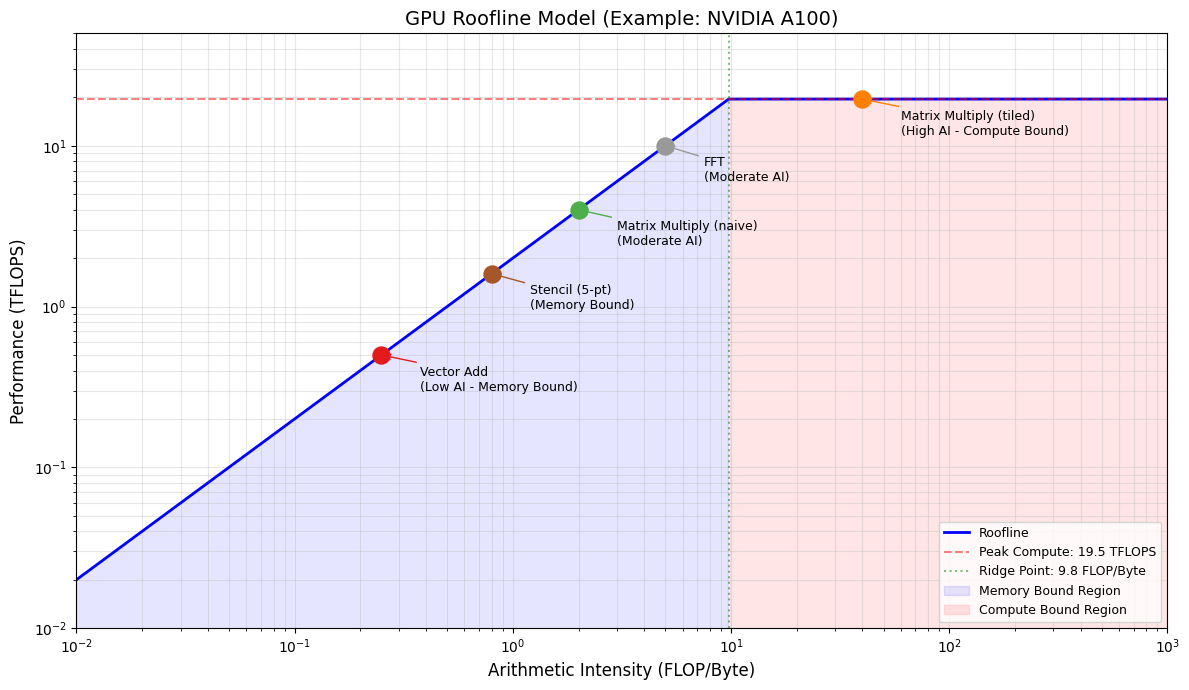

Roofline Model Analysis

📊 GPU Specifications:
   Peak Compute: 19.5 TFLOPS
   Peak Bandwidth: 2.0 TB/s
   Ridge Point: 9.75 FLOP/Byte

🎯 Kernel Analysis:

   Vector Add:
     AI: 0.25 FLOP/Byte
     Max Performance: 0.50 TFLOPS (2.6% of peak)
     Status: Memory Bound

   Matrix Multiply (naive):
     AI: 2.0 FLOP/Byte
     Max Performance: 4.00 TFLOPS (20.5% of peak)
     Status: Memory Bound

   Matrix Multiply (tiled):
     AI: 40.0 FLOP/Byte
     Max Performance: 19.50 TFLOPS (100.0% of peak)
     Status: Compute Bound

   Stencil (5-pt):
     AI: 0.8 FLOP/Byte
     Max Performance: 1.60 TFLOPS (8.2% of peak)
     Status: Memory Bound

   FFT:
     AI: 5.0 FLOP/Byte
     Max Performance: 10.00 TFLOPS (51.3% of peak)
     Status: Memory Bound


In [1]:
# Example 3.2: Roofline Model Analysis
import numpy as np
import matplotlib.pyplot as plt

def roofline_analysis():
    """Visualize the Roofline Model for GPU performance"""
    
    # GPU specifications (example: NVIDIA A100)
    peak_compute = 19.5  # TFLOPS (FP32)
    peak_bandwidth = 2.0  # TB/s
    
    # Arithmetic intensity range
    ai = np.logspace(-2, 3, 1000)
    
    # Roofline computation
    # Performance = min(Peak Compute, Peak Bandwidth × AI)
    ridge_point = peak_compute / peak_bandwidth
    performance = np.minimum(peak_compute, peak_bandwidth * ai)
    
    # Example kernels
    kernels = {
        'Vector Add': (0.25, 'Low AI - Memory Bound'),
        'Matrix Multiply (naive)': (2.0, 'Moderate AI'),
        'Matrix Multiply (tiled)': (40.0, 'High AI - Compute Bound'),
        'Stencil (5-pt)': (0.8, 'Memory Bound'),
        'FFT': (5.0, 'Moderate AI'),
    }
    
    # Plot
    plt.figure(figsize=(12, 7))
    
    # Roofline
    plt.loglog(ai, performance, 'b-', linewidth=2, label='Roofline')
    
    # Peak lines
    plt.axhline(y=peak_compute, color='r', linestyle='--', alpha=0.5, 
                label=f'Peak Compute: {peak_compute} TFLOPS')
    
    # Ridge point
    plt.axvline(x=ridge_point, color='g', linestyle=':', alpha=0.5,
                label=f'Ridge Point: {ridge_point:.1f} FLOP/Byte')
    
    # Plot kernels
    colors = plt.cm.Set1(np.linspace(0, 1, len(kernels)))
    for (name, (ai_val, desc)), color in zip(kernels.items(), colors):
        perf = min(peak_compute, peak_bandwidth * ai_val)
        plt.scatter(ai_val, perf, s=150, color=color, zorder=5)
        plt.annotate(f'{name}\n({desc})', 
                    xy=(ai_val, perf), 
                    xytext=(ai_val*1.5, perf*0.6),
                    fontsize=9,
                    arrowprops=dict(arrowstyle='->', color=color))
    
    # Regions
    plt.fill_between(ai[ai < ridge_point], 0, performance[ai < ridge_point], 
                     alpha=0.1, color='blue', label='Memory Bound Region')
    plt.fill_between(ai[ai >= ridge_point], 0, performance[ai >= ridge_point], 
                     alpha=0.1, color='red', label='Compute Bound Region')
    
    plt.xlabel('Arithmetic Intensity (FLOP/Byte)', fontsize=12)
    plt.ylabel('Performance (TFLOPS)', fontsize=12)
    plt.title('GPU Roofline Model (Example: NVIDIA A100)', fontsize=14)
    plt.legend(loc='lower right', fontsize=9)
    plt.grid(True, which='both', alpha=0.3)
    plt.xlim([0.01, 1000])
    plt.ylim([0.01, 50])
    
    plt.tight_layout()
    plt.savefig('roofline_model.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Analysis
    print("=" * 60)
    print("Roofline Model Analysis")
    print("=" * 60)
    print(f"\n📊 GPU Specifications:")
    print(f"   Peak Compute: {peak_compute} TFLOPS")
    print(f"   Peak Bandwidth: {peak_bandwidth} TB/s")
    print(f"   Ridge Point: {ridge_point:.2f} FLOP/Byte")
    
    print(f"\n🎯 Kernel Analysis:")
    for name, (ai_val, desc) in kernels.items():
        perf = min(peak_compute, peak_bandwidth * ai_val)
        efficiency = (perf / peak_compute) * 100
        bound = "Memory Bound" if ai_val < ridge_point else "Compute Bound"
        print(f"\n   {name}:")
        print(f"     AI: {ai_val} FLOP/Byte")
        print(f"     Max Performance: {perf:.2f} TFLOPS ({efficiency:.1f}% of peak)")
        print(f"     Status: {bound}")

roofline_analysis()

## 📝 Exercices du Chapitre III

### Niveau Facile ⭐

**Exercice 3.1:** Explain the following terms:

- Kernel, Grid, Block, Thread, Warp
- Global memory vs Shared memory
- Memory coalescing
- Thread divergence

**Exercice 3.2:** Calculate thread organization:
a) For N = 1,000,000 elements with 256 threads/block, how many blocks?
b) What is the global thread ID for thread 50 in block 100?
c) Why is the block size typically a multiple of 32?

**Exercice 3.3:** Identify which operations are suitable for GPU:

- Sorting 1000 integers
- Adding two 10-million element vectors
- Recursive tree traversal
- Image convolution (1000×1000 image)
- Parsing XML files

---

### Niveau Moyen ⭐⭐

**Exercice 3.4 (CUDA):** Write a CUDA kernel for:
a) Element-wise multiplication: C[i] = A[i] _ B[i]
b) Scalar multiplication: C[i] = A[i] _ scalar
Include proper thread indexing and bounds checking.

**Exercice 3.5 (Memory):** Analyze memory access patterns:

```cuda
// Pattern A
for (int i = 0; i < N; i++) {
    output[i] = input[i * stride];
}

// Pattern B
for (int i = 0; i < N; i++) {
    output[i] = input[threadIdx.x + blockIdx.x * blockDim.x];
}
```

Which pattern has coalesced access? Explain.

**Exercice 3.6 (Optimization):** Given a matrix multiplication kernel:

- Calculate the arithmetic intensity
- Is it memory-bound or compute-bound?
- Propose optimizations using shared memory

---

### Niveau Difficile ⭐⭐⭐

**Exercice 3.7 (Tiled Matrix Multiply):** Implement tiled matrix multiplication:

- Use shared memory tiles of size 16×16
- Handle matrices not divisible by tile size
- Compare performance with naive version

**Exercice 3.8 (Reduction):** Implement parallel reduction to sum an array:

- Use shared memory within each block
- Handle arbitrary array sizes
- Optimize to avoid bank conflicts

**Exercice 3.9 (Performance Analysis):**
For a GPU with:

- 80 SMs, 2048 threads/SM max
- 16.4 TFLOPS FP32
- 2 TB/s bandwidth

Calculate:
a) Maximum concurrent threads
b) Ridge point for roofline model
c) Expected performance for a kernel with AI = 10 FLOP/byte


### 📋 Solutions des Exercices du Chapitre III

<details>
<summary><b>Solution Exercice 3.2 - Thread Organization</b> (Click to expand)</summary>

**a) Number of blocks:**
$$\text{blocks} = \lceil \frac{N}{\text{threadsPerBlock}} \rceil = \lceil \frac{1,000,000}{256} \rceil = 3907$$

Actually: $3906 \times 256 = 999,936$, so we need 3907 blocks (last block has 64 active threads).

**b) Global thread ID:**
$$\text{globalId} = \text{blockIdx.x} \times \text{blockDim.x} + \text{threadIdx.x}$$
$$\text{globalId} = 100 \times 256 + 50 = 25,650$$

**c) Block size multiple of 32:**

- A warp consists of 32 threads
- Warp is the minimum scheduling unit
- Non-multiple sizes waste resources (partial warps)
- Common sizes: 128, 256, 512, 1024

</details>

<details>
<summary><b>Solution Exercice 3.4 - CUDA Kernels</b> (Click to expand)</summary>

**a) Element-wise multiplication:**

```cuda
__global__ void elementMul(float* A, float* B, float* C, int N) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    if (idx < N) {
        C[idx] = A[idx] * B[idx];
    }
}

// Launch: elementMul<<<(N+255)/256, 256>>>(d_A, d_B, d_C, N);
```

**b) Scalar multiplication:**

```cuda
__global__ void scalarMul(float* A, float* C, float scalar, int N) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    if (idx < N) {
        C[idx] = A[idx] * scalar;
    }
}

// Launch: scalarMul<<<(N+255)/256, 256>>>(d_A, d_C, 2.5f, N);
```

</details>

<details>
<summary><b>Solution Exercice 3.9 - Performance Analysis</b> (Click to expand)</summary>

**Given:**

- 80 SMs, 2048 threads/SM max
- 16.4 TFLOPS FP32
- 2 TB/s bandwidth

**a) Maximum concurrent threads:**
$$\text{maxThreads} = 80 \times 2048 = 163,840$$

**b) Ridge point:**
$$\text{ridgePoint} = \frac{\text{peakCompute}}{\text{peakBandwidth}} = \frac{16.4 \text{ TFLOPS}}{2 \text{ TB/s}} = 8.2 \text{ FLOP/byte}$$

**c) Performance at AI = 10 FLOP/byte:**

Since $AI = 10 > \text{ridgePoint} = 8.2$, the kernel is **compute-bound**.

$$\text{Performance} = \min(16.4, 2 \times 10) = \min(16.4, 20) = 16.4 \text{ TFLOPS}$$

The kernel can achieve peak compute performance!

</details>


---
# Chapitre IV: Nouvelles Technologies HPC
## (Quantum Computing, TPU, AI Chips, Cooling Systems)
---

## 4.1 Quantum Computing pour le HPC

### 4.1.1 Introduction au Calcul Quantique

**Quantum Computing** uses quantum mechanical phenomena to perform computations:

- **Superposition:** Qubits can be 0 and 1 simultaneously
- **Entanglement:** Qubits can be correlated
- **Interference:** Quantum states can amplify or cancel

```
┌──────────────────────────────────────────────────────────────────┐
│              CLASSICAL vs QUANTUM COMPUTING                      │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   CLASSICAL BIT                     QUANTUM BIT (QUBIT)          │
│   ────────────                      ──────────────────           │
│                                                                   │
│       │0⟩                               │ψ⟩                      │
│       ╱╲                            ╱ α │0⟩                      │
│      ╱  ╲                          ╱         ╲                   │
│     ╱    ╲                        │           │                  │
│    ╱      ╲                       │  α|0⟩ + β|1⟩                 │
│   │   0    │                      │           │                  │
│   │   or   │                       ╲         ╱                   │
│   │   1    │                        ╲ β │1⟩                      │
│                                                                   │
│   Definite state                   Superposition of states       │
│   (0 OR 1)                         (0 AND 1 with probabilities)  │
│                                                                   │
│   n bits = n values                n qubits = 2ⁿ values          │
│   (linear scaling)                 (exponential scaling!)        │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.1.2 Quantum Advantage Areas

| Problem               | Classical       | Quantum       | Advantage   |
| --------------------- | --------------- | ------------- | ----------- |
| **Integer Factoring** | O(exp(n^{1/3})) | O(n³)         | Exponential |
| **Database Search**   | O(N)            | O(√N)         | Quadratic   |
| **Optimization**      | O(2^n)          | O(n) possible | Exponential |
| **Simulation**        | O(2^n)          | O(poly(n))    | Exponential |

### 4.1.3 Key Quantum Algorithms

**Shor's Algorithm (Factoring):**

- Breaks RSA encryption
- Polynomial time on quantum computer
- Requires ~4000 logical qubits for 2048-bit RSA

**Grover's Algorithm (Search):**

- Quadratic speedup for unstructured search
- Search N items in O(√N) instead of O(N)

**VQE (Variational Quantum Eigensolver):**

- Molecular simulation
- Hybrid quantum-classical approach
- Near-term quantum computers

### 4.1.4 Current Quantum Hardware

```
┌──────────────────────────────────────────────────────────────────┐
│             QUANTUM HARDWARE LANDSCAPE (2024)                    │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Technology        Qubits    Coherence    Companies             │
│   ────────────────────────────────────────────────────           │
│   Superconducting   1000+     ~100 μs      IBM, Google           │
│   Trapped Ion       30+       ~1 s         IonQ, Quantinuum      │
│   Photonic          100+      N/A          Xanadu, PsiQuantum    │
│   Neutral Atom      1000+     ~1 s         QuEra, Pasqal         │
│   Topological       ?         Long         Microsoft (research)  │
│                                                                   │
│   Challenges:                                                    │
│   • Decoherence (qubits lose quantum state)                     │
│   • Error rates (need error correction)                         │
│   • Scaling (maintaining quality with more qubits)              │
│   • Temperature (most need ~15 mK, colder than space!)          │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.1.5 Quantum-HPC Integration

```
┌──────────────────────────────────────────────────────────────────┐
│              HYBRID CLASSICAL-QUANTUM WORKFLOW                   │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Classical HPC                    Quantum Computer              │
│   ┌──────────────┐                 ┌──────────────┐              │
│   │              │   Parameters    │              │              │
│   │  Optimizer   │ ───────────────▶│   Quantum    │              │
│   │  (CPU/GPU)   │                 │   Circuit    │              │
│   │              │◀─────────────── │              │              │
│   │              │   Measurements  │              │              │
│   └──────────────┘                 └──────────────┘              │
│                                                                   │
│   Applications:                                                  │
│   • Drug discovery (molecular simulation)                       │
│   • Financial modeling (optimization)                           │
│   • Machine learning (quantum ML)                               │
│   • Cryptography (post-quantum)                                 │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```


## 4.2 TPU (Tensor Processing Units)

### 4.2.1 Introduction to TPUs

**TPUs** are Google's custom-designed ASICs (Application-Specific Integrated Circuits) optimized for machine learning workloads.

```
┌──────────────────────────────────────────────────────────────────┐
│                    TPU Architecture                               │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Key Innovation: Matrix Multiply Unit (MXU)                     │
│                                                                   │
│   ┌─────────────────────────────────────────────────────────┐   │
│   │              128×128 Systolic Array                      │   │
│   │                                                          │   │
│   │   Weight →  ○ ○ ○ ○ ○ ○ ○ ○ ○ ○ ○ ○ ... (128 PEs)       │   │
│   │            ↓↓↓↓↓↓↓↓↓↓↓↓                                 │   │
│   │   Input →  ○ ○ ○ ○ ○ ○ ○ ○ ○ ○ ○ ○                      │   │
│   │            ↓↓↓↓↓↓↓↓↓↓↓↓                                 │   │
│   │            ○ ○ ○ ○ ○ ○ ○ ○ ○ ○ ○ ○                      │   │
│   │            ↓↓↓↓↓↓↓↓↓↓↓↓                                 │   │
│   │           ... (128 rows)                                 │   │
│   │            ↓↓↓↓↓↓↓↓↓↓↓↓                                 │   │
│   │                    → Accumulated Output                  │   │
│   │                                                          │   │
│   │   Each PE: MAC (Multiply-Accumulate)                     │   │
│   │   Total: 128×128 = 16,384 MACs per cycle!               │   │
│   │                                                          │   │
│   └─────────────────────────────────────────────────────────┘   │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.2.2 TPU Generations

| Generation     | Peak TFLOPS | Memory     | Use Case                 |
| -------------- | ----------- | ---------- | ------------------------ |
| TPU v1 (2016)  | 92 (INT8)   | -          | Inference only           |
| TPU v2 (2017)  | 180 (BF16)  | 64 GB HBM  | Training & Inference     |
| TPU v3 (2018)  | 420 (BF16)  | 128 GB HBM | Large-scale training     |
| TPU v4 (2021)  | 275 (BF16)  | 128 GB HBM | Optimized efficiency     |
| TPU v5e (2023) | 197 (BF16)  | 16 GB      | Cost-effective inference |
| TPU v5p (2023) | 459 (BF16)  | 95 GB HBM  | Largest models           |

### 4.2.3 TPU vs GPU Comparison

```
┌──────────────────────────────────────────────────────────────────┐
│                    TPU vs GPU for ML                             │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Aspect              TPU                 GPU                    │
│   ─────────────────────────────────────────────────              │
│   Design Focus        ML-specific         General purpose        │
│   Matrix Ops          Systolic array      CUDA cores            │
│   Precision           BF16, INT8          FP16, FP32, TF32      │
│   Memory              HBM                 HBM/GDDR              │
│   Programming         TensorFlow, JAX     CUDA, cuDNN           │
│   Flexibility         Limited             High                   │
│   Availability        Google Cloud        Everywhere             │
│                                                                   │
│   Best For:                                                      │
│   TPU: Large-scale training of transformer models               │
│   GPU: Diverse workloads, research, inference                   │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.2.4 Using TPUs in Practice

```python
# JAX example for TPU
import jax
import jax.numpy as jnp

# Check available devices
print(jax.devices())  # Shows TPU cores if available

# Data is automatically sharded across TPU cores
@jax.jit
def matrix_multiply(A, B):
    return jnp.dot(A, B)

# TPUs excel at large batch matrix operations
A = jnp.ones((4096, 4096))
B = jnp.ones((4096, 4096))
C = matrix_multiply(A, B)
```


## 4.3 AI Accelerators and Specialized Chips

### 4.3.1 Landscape of AI Hardware

```
┌──────────────────────────────────────────────────────────────────┐
│                AI ACCELERATOR ECOSYSTEM                          │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   ┌─────────────┐  ┌─────────────┐  ┌─────────────┐             │
│   │    GPUs     │  │    TPUs     │  │   Custom    │             │
│   │  (NVIDIA)   │  │  (Google)   │  │   ASICs     │             │
│   │             │  │             │  │             │             │
│   │ • H100      │  │ • TPU v5    │  │ • AWS Trainium│            │
│   │ • A100      │  │ • TPU v4    │  │ • Tesla Dojo │            │
│   │ • RTX 4090  │  │             │  │ • Cerebras  │             │
│   └─────────────┘  └─────────────┘  └─────────────┘             │
│                                                                   │
│   ┌─────────────┐  ┌─────────────┐  ┌─────────────┐             │
│   │   FPGAs     │  │    NPUs     │  │  Neuromorph │             │
│   │             │  │ (Edge AI)   │  │   Chips     │             │
│   │             │  │             │  │             │             │
│   │ • Intel     │  │ • Apple M3  │  │ • Intel     │             │
│   │ • Xilinx    │  │ • Qualcomm  │  │   Loihi     │             │
│   │             │  │ • Google    │  │ • IBM       │             │
│   └─────────────┘  └─────────────┘  └─────────────┘             │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.3.2 Notable AI Accelerators

**NVIDIA H100 (Hopper Architecture):**

```
┌──────────────────────────────────────────────────────────────────┐
│                    NVIDIA H100 Specifications                    │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Performance:                                                   │
│   • FP8: 3,958 TFLOPS (sparse)                                  │
│   • FP16: 1,979 TFLOPS (sparse)                                 │
│   • FP32: 67 TFLOPS                                             │
│   • TF32: 989 TFLOPS (sparse)                                   │
│                                                                   │
│   Memory:                                                        │
│   • 80 GB HBM3                                                   │
│   • 3.35 TB/s bandwidth                                         │
│                                                                   │
│   Architecture:                                                  │
│   • 132 SMs                                                      │
│   • 4th Gen Tensor Cores                                        │
│   • Transformer Engine (FP8)                                    │
│   • NVLink 4.0 (900 GB/s)                                       │
│                                                                   │
│   TDP: 700W                                                      │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

**AWS Trainium & Inferentia:**

- Custom chips for ML on AWS
- Trainium: Training workloads
- Inferentia: Inference optimization
- Integration with SageMaker

**Cerebras Wafer-Scale Engine:**

- 850,000 cores on single wafer
- 40 GB on-chip memory
- Eliminates memory bottleneck
- Entire model fits on chip

### 4.3.3 Comparison of AI Accelerators

| Accelerator    | Peak TFLOPS | Memory BW | Power | Best For     |
| -------------- | ----------- | --------- | ----- | ------------ |
| NVIDIA H100    | 3958 (FP8)  | 3.35 TB/s | 700W  | General AI   |
| Google TPU v5p | 459 (BF16)  | 4.8 TB/s  | 450W  | Transformers |
| AMD MI300X     | 2610 (FP8)  | 5.3 TB/s  | 750W  | General AI   |
| Intel Gaudi 3  | 1835 (BF16) | 3.7 TB/s  | 600W  | Training     |
| AWS Trainium2  | 380 (BF16)  | 1.5 TB/s  | 450W  | Cloud ML     |

### 4.3.4 Edge AI Accelerators

```
┌──────────────────────────────────────────────────────────────────┐
│                    EDGE AI DEPLOYMENT                            │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Cloud AI                         Edge AI                       │
│   ────────                         ───────                       │
│   • Training                       • Inference                   │
│   • High power                     • Low power                   │
│   • High latency                   • Low latency                 │
│   • Internet required              • Offline capable             │
│                                                                   │
│   Edge Accelerators:                                             │
│   ┌─────────────────────────────────────────────────────────┐   │
│   │ Apple Neural Engine (M3)    │ 18 TOPS, ~5W              │   │
│   │ Google Edge TPU             │ 4 TOPS, ~2W               │   │
│   │ NVIDIA Jetson Orin         │ 275 TOPS, 60W             │   │
│   │ Qualcomm Hexagon           │ 73 TOPS, ~15W             │   │
│   │ Intel Movidius             │ 4 TOPS, ~1W               │   │
│   └─────────────────────────────────────────────────────────┘   │
│                                                                   │
│   Applications:                                                  │
│   • Autonomous vehicles                                         │
│   • Mobile phones                                               │
│   • IoT devices                                                 │
│   • Robotics                                                    │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```


## 4.4 Cooling and Power Management in HPC

### 4.4.1 The Power Challenge

Modern HPC systems face significant thermal challenges:

- **Power density:** ~50-100 kW per rack
- **Heat generation:** Every watt consumed becomes heat
- **Cooling overhead:** 30-50% of total data center power

```
┌──────────────────────────────────────────────────────────────────┐
│                  HPC POWER BREAKDOWN                             │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   Total Data Center Power                                        │
│   ┌────────────────────────────────────────────────────────┐    │
│   │                                                         │    │
│   │  ████████████████████████████  Computing (55-65%)      │    │
│   │  ██████████████                Cooling (25-35%)        │    │
│   │  ████                          Networking (5-8%)       │    │
│   │  ██                            Other (2-5%)            │    │
│   │                                                         │    │
│   └────────────────────────────────────────────────────────┘    │
│                                                                   │
│   PUE (Power Usage Effectiveness) = Total Power / IT Power      │
│   • Traditional DC: PUE = 2.0 (100% overhead)                   │
│   • Modern DC: PUE = 1.2-1.4                                    │
│   • Best-in-class: PUE < 1.1                                    │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.4.2 Cooling Technologies

```
┌──────────────────────────────────────────────────────────────────┐
│                  COOLING METHODS                                 │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   AIR COOLING                                                    │
│   ───────────                                                    │
│   • Traditional CRAC (Computer Room Air Conditioning)           │
│   • Hot/cold aisle containment                                  │
│   • Limit: ~15-20 kW/rack                                       │
│   • PUE: 1.4-2.0                                                │
│                                                                   │
│   ┌─────────────────────────────────────────────┐               │
│   │  Cold    │ Rack │ Rack │ Rack │ Rack │ Hot  │               │
│   │  Aisle   │      │      │      │      │ Aisle│               │
│   │  ════►   │  ↑   │  ↑   │  ↑   │  ↑   │ ════►│               │
│   │          │      │      │      │      │      │               │
│   │  CRAC ◄══════════════════════════════════════│               │
│   └─────────────────────────────────────────────┘               │
│                                                                   │
│   LIQUID COOLING                                                 │
│   ──────────────                                                 │
│   Direct-to-chip (Cold plates):                                 │
│   • Water/coolant circulated through CPU/GPU                    │
│   • 10-50x better heat transfer than air                        │
│   • Supports: 30-50+ kW/rack                                    │
│   • PUE: 1.1-1.2                                                │
│                                                                   │
│   ┌───────────────────────┐                                     │
│   │     CPU/GPU Die       │                                     │
│   │    ┌───────────┐      │                                     │
│   │    │ Cold Plate│◄─── Cold water in                         │
│   │    └─────┬─────┘                                            │
│   │          │                                                   │
│   │          └────────►  Warm water out                         │
│   └───────────────────────┘                                     │
│                                                                   │
│   IMMERSION COOLING                                              │
│   ─────────────────                                              │
│   • Entire servers submerged in dielectric fluid                │
│   • Single-phase or two-phase (boiling)                         │
│   • Highest density: 100+ kW/rack                               │
│   • PUE: < 1.1                                                  │
│                                                                   │
│   ┌───────────────────────────┐                                 │
│   │    ≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈    │                                 │
│   │    ≈ Dielectric Fluid ≈  │                                 │
│   │    ≈  ┌──────────────┐ ≈  │                                 │
│   │    ≈  │   Server     │ ≈  │                                 │
│   │    ≈  │   Board      │ ≈  │                                 │
│   │    ≈  └──────────────┘ ≈  │                                 │
│   │    ≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈    │                                 │
│   └───────────────────────────┘                                 │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.4.3 Cooling Comparison

| Method                   | Heat Removal | PUE       | Cost      | Complexity |
| ------------------------ | ------------ | --------- | --------- | ---------- |
| Air (traditional)        | 15 kW/rack   | 1.6-2.0   | Low       | Low        |
| Air (optimized)          | 20 kW/rack   | 1.3-1.5   | Medium    | Medium     |
| Rear-door heat exchanger | 30 kW/rack   | 1.2-1.3   | Medium    | Medium     |
| Direct-to-chip liquid    | 50 kW/rack   | 1.1-1.2   | High      | High       |
| Immersion (single-phase) | 100 kW/rack  | 1.03-1.08 | Very High | Very High  |
| Immersion (two-phase)    | 150+ kW/rack | <1.05     | Highest   | Highest    |

### 4.4.4 Power Management Techniques

```
┌──────────────────────────────────────────────────────────────────┐
│                  POWER MANAGEMENT                                │
├──────────────────────────────────────────────────────────────────┤
│                                                                   │
│   DYNAMIC VOLTAGE/FREQUENCY SCALING (DVFS)                      │
│   ─────────────────────────────────────────                     │
│   • Lower frequency → Lower voltage → Lower power               │
│   • Power ∝ V² × f                                              │
│   • Trade-off: Performance vs Energy                            │
│                                                                   │
│   POWER CAPPING                                                  │
│   ────────────                                                   │
│   • Set maximum power per node/rack                             │
│   • Prevents thermal runaway                                    │
│   • Ensures facility stays within limits                        │
│                                                                   │
│   JOB SCHEDULING                                                 │
│   ─────────────                                                  │
│   • Schedule power-hungry jobs across time                      │
│   • Balance thermal load across system                          │
│   • Consider renewable energy availability                      │
│                                                                   │
│   SLEEP STATES                                                   │
│   ────────────                                                   │
│   • C-states (CPU idle states)                                  │
│   • P-states (performance states)                               │
│   • S-states (system sleep states)                              │
│                                                                   │
└──────────────────────────────────────────────────────────────────┘
```

### 4.4.5 Sustainable HPC

**Green Computing Initiatives:**

- Use of renewable energy (solar, wind, hydro)
- Waste heat reuse (district heating)
- Carbon-neutral data centers
- Efficient hardware lifecycle management


In [ ]:
# Example 4.1: Power and Cooling Analysis
import numpy as np
import matplotlib.pyplot as plt

def hpc_power_analysis():
    """Analyze power consumption and cooling requirements"""
    
    print("=" * 60)
    print("HPC Power and Cooling Analysis")
    print("=" * 60)
    
    # Scenario: 1000-node HPC cluster
    nodes = 1000
    cpus_per_node = 2
    gpus_per_node = 4
    
    # Power consumption
    cpu_tdp = 350  # Watts (e.g., AMD EPYC)
    gpu_tdp = 700  # Watts (e.g., NVIDIA H100)
    other_power = 200  # Memory, storage, networking per node
    
    node_power = (cpus_per_node * cpu_tdp + 
                  gpus_per_node * gpu_tdp + 
                  other_power)
    total_it_power = nodes * node_power / 1000  # kW
    
    print(f"\n📊 Cluster Configuration:")
    print(f"   Nodes: {nodes}")
    print(f"   CPUs per node: {cpus_per_node} ({cpu_tdp}W each)")
    print(f"   GPUs per node: {gpus_per_node} ({gpu_tdp}W each)")
    print(f"   Other power per node: {other_power}W")
    print(f"   Power per node: {node_power/1000:.1f} kW")
    print(f"   Total IT Power: {total_it_power:.0f} kW ({total_it_power/1000:.1f} MW)")
    
    # Cooling analysis
    pue_values = {
        'Traditional Air': 2.0,
        'Optimized Air': 1.5,
        'Liquid Cooling': 1.2,
        'Immersion': 1.05
    }
    
    print(f"\n❄️ Cooling Scenarios (Total Facility Power):")
    cooling_powers = {}
    for method, pue in pue_values.items():
        total_power = total_it_power * pue
        cooling_power = total_power - total_it_power
        cooling_powers[method] = cooling_power
        print(f"   {method}:")
        print(f"     PUE: {pue}")
        print(f"     Total Power: {total_power:.0f} kW")
        print(f"     Cooling Overhead: {cooling_power:.0f} kW ({(pue-1)*100:.0f}%)")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart of power breakdown
    ax1 = axes[0]
    methods = list(pue_values.keys())
    x = np.arange(len(methods))
    width = 0.35
    
    it_powers = [total_it_power] * len(methods)
    cooling = [cooling_powers[m] for m in methods]
    
    bars1 = ax1.bar(x - width/2, it_powers, width, label='IT Power', color='steelblue')
    bars2 = ax1.bar(x + width/2, cooling, width, label='Cooling Power', color='coral')
    
    ax1.set_xlabel('Cooling Method', fontsize=12)
    ax1.set_ylabel('Power (kW)', fontsize=12)
    ax1.set_title('Power Consumption by Cooling Method', fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(methods, rotation=15)
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Annual cost comparison
    ax2 = axes[1]
    electricity_cost = 0.10  # $/kWh
    hours_per_year = 8760
    
    annual_costs = []
    for method, pue in pue_values.items():
        total_power = total_it_power * pue
        annual_cost = total_power * hours_per_year * electricity_cost / 1e6  # $M
        annual_costs.append(annual_cost)
    
    colors = plt.cm.RdYlGn(np.linspace(0.8, 0.2, len(methods)))
    bars = ax2.bar(methods, annual_costs, color=colors)
    ax2.set_xlabel('Cooling Method', fontsize=12)
    ax2.set_ylabel('Annual Electricity Cost ($M)', fontsize=12)
    ax2.set_title('Annual Operating Cost Comparison', fontsize=14)
    ax2.tick_params(axis='x', rotation=15)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add values on bars
    for bar, cost in zip(bars, annual_costs):
        ax2.annotate(f'${cost:.1f}M', 
                    xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('hpc_power_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Cost savings analysis
    print(f"\n💰 Annual Cost Savings (vs Traditional Air @ ${electricity_cost}/kWh):")
    baseline_cost = annual_costs[0]
    for method, cost in zip(methods[1:], annual_costs[1:]):
        savings = baseline_cost - cost
        print(f"   {method}: ${savings:.2f}M/year saved")

hpc_power_analysis()

## 📝 Exercices du Chapitre IV

### Niveau Facile ⭐

**Exercice 4.1:** Define and explain:

- Qubit vs Classical bit
- Superposition and Entanglement
- Quantum advantage/supremacy
- PUE (Power Usage Effectiveness)

**Exercice 4.2:** Compare TPUs and GPUs:

- Target applications
- Architecture differences
- Programming models
- When to choose each

**Exercice 4.3:** List three advantages and disadvantages of:

- Liquid cooling
- Immersion cooling
- Air cooling

---

### Niveau Moyen ⭐⭐

**Exercice 4.4 (Quantum):**
For a quantum computer with 50 qubits:
a) How many classical bits would be needed to represent all possible states?
b) If each state requires 8 bytes, how much memory would a classical simulation need?
c) Why is this called "quantum advantage"?

**Exercice 4.5 (TPU Analysis):**
Given TPU v4 with 275 TFLOPS (BF16) and a transformer model:

- Attention operation: O(n² × d) FLOPs per layer
- n = sequence length = 2048, d = model dimension = 4096
- 96 layers

Calculate:
a) FLOPs per forward pass
b) Theoretical time for one forward pass
c) Why is actual time much higher?

**Exercice 4.6 (Power):**
A data center has:

- IT load: 5 MW
- Current PUE: 1.8
- Electricity cost: $0.08/kWh

Calculate:
a) Total facility power
b) Annual electricity cost
c) Savings if PUE is reduced to 1.2

---

### Niveau Difficile ⭐⭐⭐

**Exercice 4.7 (System Design):**
Design a cooling solution for a new 10 MW HPC facility:

- Target PUE: < 1.15
- Located in a cold climate
- Must handle 100 kW/rack density
- Budget: $50M for cooling infrastructure

Propose and justify:

- Primary cooling method
- Heat rejection system
- Backup systems
- Expected operating costs

**Exercice 4.8 (Quantum Algorithms):**
Implement (conceptually) Grover's search algorithm:
a) Describe the oracle function
b) Explain the diffusion operator
c) Calculate optimal number of iterations for N = 1024
d) Compare with classical search complexity

**Exercice 4.9 (Heterogeneous Computing):**
Design an optimal hardware configuration for training a 100B parameter LLM:

- Estimate memory requirements
- Choose between GPU/TPU/custom accelerators
- Design interconnect topology
- Estimate training time and cost


### 📋 Solutions des Exercices du Chapitre IV

<details>
<summary><b>Solution Exercice 4.4 - Quantum Computing</b> (Click to expand)</summary>

**Given:** 50 qubits

**a) Classical bits needed:**
$$\text{states} = 2^{50} = 1,125,899,906,842,624 \approx 1.13 \times 10^{15}$$

To represent all amplitudes (complex numbers), we need to store $2^{50}$ complex values, each with 2 components (real + imaginary).

**b) Memory required:**
$$\text{memory} = 2^{50} \times 2 \times 8 \text{ bytes} = 2^{50} \times 16 \text{ bytes}$$
$$= 18,014,398,509,481,984 \text{ bytes} \approx 16 \text{ PB (petabytes)}$$

**c) Quantum advantage:**

- Classical computers need exponential resources to simulate quantum systems
- 50+ qubits exceeds what any classical computer can efficiently simulate
- This is where quantum computers provide practical advantage

</details>

<details>
<summary><b>Solution Exercice 4.5 - TPU Analysis</b> (Click to expand)</summary>

**Given:**

- TPU v4: 275 TFLOPS (BF16)
- n = 2048, d = 4096, 96 layers

**a) FLOPs per forward pass:**

Attention FLOPs per layer (simplified):
$$\text{FLOPs}_{\text{attention}} = 4 \times n^2 \times d$$
$$= 4 \times 2048^2 \times 4096 = 68,719,476,736 \approx 69 \text{ GFLOPS}$$

For 96 layers:
$$\text{Total} = 96 \times 69 \text{ GFLOPS} = 6.6 \text{ TFLOPS}$$

(Note: This is simplified; real transformers have more operations)

**b) Theoretical time:**
$$t = \frac{\text{FLOPs}}{\text{Peak TFLOPS}} = \frac{6.6 \times 10^{12}}{275 \times 10^{12}} \approx 0.024 \text{ seconds}$$

**c) Why actual time is higher:**

- Memory bandwidth limitations (data loading)
- Memory capacity (model may not fit)
- Synchronization overhead
- Less than 100% hardware utilization
- Actual achievable efficiency: 30-60% of peak

</details>

<details>
<summary><b>Solution Exercice 4.6 - Power Calculation</b> (Click to expand)</summary>

**Given:**

- IT load: 5 MW
- Current PUE: 1.8
- Electricity: $0.08/kWh

**a) Total facility power:**
$$P_{total} = P_{IT} \times PUE = 5 \text{ MW} \times 1.8 = 9 \text{ MW}$$

**b) Annual electricity cost:**
$$\text{Hours/year} = 24 \times 365 = 8,760$$
$$\text{Annual cost} = 9,000 \text{ kW} \times 8,760 \text{ h} \times \$0.08/\text{kWh}$$
$$= \$6,307,200 \approx \$6.3 \text{ M/year}$$

**c) Savings with PUE = 1.2:**
$$P_{new} = 5 \text{ MW} \times 1.2 = 6 \text{ MW}$$
$$\text{New cost} = 6,000 \times 8,760 \times 0.08 = \$4,204,800$$
$$\text{Savings} = \$6,307,200 - \$4,204,800 = \$2,102,400 \approx \$2.1 \text{ M/year}$$

</details>


---

# 📝 Examen de Mi-Parcours (Mid-Term Exam)

**Duration:** 2 hours  
**Total Points:** 100  
**Chapters Covered:** I & II

---

## Part A: Multiple Choice Questions (20 points)

**Q1. (2 pts)** According to Amdahl's Law, if 95% of a program is parallelizable, the maximum theoretical speedup is:

- a) 95x
- b) 20x
- c) 19x
- d) Infinite

**Q2. (2 pts)** Which architecture classification describes modern multi-core CPUs?

- a) SISD
- b) SIMD
- c) MISD
- d) MIMD

**Q3. (2 pts)** In MPI, what does `MPI_Bcast` do?

- a) Sends data from one process to another
- b) Gathers data from all processes to root
- c) Distributes data from root to all processes
- d) Both b and c

**Q4. (2 pts)** In OpenMP, a `reduction(+:sum)` clause:

- a) Creates shared variable across all threads
- b) Creates private copies that are combined at the end
- c) Prevents race conditions using locks
- d) Distributes work evenly among threads

**Q5. (2 pts)** False sharing in parallel programming occurs when:

- a) Two threads access the same variable
- b) Two threads access different variables in the same cache line
- c) Cache coherence protocol fails
- d) Memory is not properly allocated

**Q6. (2 pts)** The MESI protocol state "Modified" means:

- a) Data is shared with other caches
- b) Data is dirty and only in this cache
- c) Data has been invalidated
- d) Data is exclusive but clean

**Q7. (2 pts)** Gustafson's Law differs from Amdahl's Law by assuming:

- a) No sequential portion
- b) Fixed problem size
- c) Problem size scales with processors
- d) Perfect parallelization

**Q8. (2 pts)** Which MPI function should be used for all-to-all data exchange?

- a) MPI_Scatter
- b) MPI_Allgather
- c) MPI_Alltoall
- d) MPI_Bcast

**Q9. (2 pts)** A pthread_barrier_t is used to:

- a) Prevent race conditions
- b) Protect critical sections
- c) Synchronize threads at a point
- d) Enable producer-consumer patterns

**Q10. (2 pts)** The optimal network topology for minimizing diameter in large clusters is:

- a) Ring
- b) 2D Mesh
- c) Fat Tree
- d) Linear Array

---

## Part B: Short Answer Questions (30 points)

**Q11. (6 pts)** Explain the difference between strong scaling and weak scaling. Give an example where each would be preferred.

**Q12. (6 pts)** Compare blocking and non-blocking MPI communication. When would you use non-blocking?

**Q13. (6 pts)** Describe the fork-join model in OpenMP. Draw a simple diagram.

**Q14. (6 pts)** What is cache coherence? Why is it important in shared-memory systems?

**Q15. (6 pts)** Explain the difference between `#pragma omp critical` and `#pragma omp atomic`.

---

## Part C: Problem Solving (50 points)

**Q16. (15 pts)** A parallel program shows the following performance:

| Processors | Time (s) |
| ---------- | -------- |
| 1          | 100      |
| 2          | 55       |
| 4          | 30       |
| 8          | 18       |
| 16         | 12       |

a) Calculate speedup and efficiency for each configuration (6 pts)
b) Estimate the sequential fraction using Amdahl's Law (4 pts)
c) Predict the time for 32 processors (3 pts)
d) Is this strong or weak scaling? Explain (2 pts)

**Q17. (15 pts)** Write MPI pseudocode for parallel Monte Carlo estimation of π:

- Each process generates random points
- Count points inside unit circle
- Combine results to estimate π = 4 × (inside/total)

Your code should:
a) Distribute work among processes (5 pts)
b) Use appropriate collective operation for combining results (5 pts)
c) Only print result from rank 0 (5 pts)

**Q18. (10 pts)** Given the following OpenMP code, identify and fix all bugs:

```c
int sum = 0;
int arr[N];
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    sum += arr[i];  // Bug 1
}

int max_val = 0;
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    if (arr[i] > max_val) {
        max_val = arr[i];  // Bug 2
    }
}
```

**Q19. (10 pts)** Design a 2D mesh network for 64 processors:
a) Draw the topology (3 pts)
b) Calculate diameter and node degree (3 pts)
c) Describe the routing algorithm for message from (0,0) to (7,7) (4 pts)


## 📋 Solutions de l'Examen Mi-Parcours

<details>
<summary><b>Part A Solutions - Multiple Choice</b> (Click to expand)</summary>

| Question | Answer              | Explanation                                           |
| -------- | ------------------- | ----------------------------------------------------- |
| Q1       | **b) 20x**          | $S_{max} = 1/f = 1/0.05 = 20$                         |
| Q2       | **d) MIMD**         | Multiple cores, each executing different instructions |
| Q3       | **c)**              | Broadcast distributes from root to all                |
| Q4       | **b)**              | Each thread gets private copy, combined at end        |
| Q5       | **b)**              | Different variables in same cache line                |
| Q6       | **b)**              | Modified = dirty, exclusive to this cache             |
| Q7       | **c)**              | Problem size scales with processor count              |
| Q8       | **c) MPI_Alltoall** | Every process sends to every other process            |
| Q9       | **c)**              | Threads wait until all arrive                         |
| Q10      | **c) Fat Tree**     | Diameter = O(log n), good bisection bandwidth         |

</details>

<details>
<summary><b>Q16 Solution - Performance Analysis</b> (Click to expand)</summary>

**a) Speedup and Efficiency:**

| P   | T(s) | Speedup S=T₁/Tₚ | Efficiency E=S/P |
| --- | ---- | --------------- | ---------------- |
| 1   | 100  | 1.00            | 100%             |
| 2   | 55   | 1.82            | 91%              |
| 4   | 30   | 3.33            | 83%              |
| 8   | 18   | 5.56            | 69%              |
| 16  | 12   | 8.33            | 52%              |

**b) Estimate sequential fraction:**

Using Amdahl's Law with p=16, S=8.33:
$$8.33 = \frac{1}{f + \frac{1-f}{16}}$$
$$f + \frac{1-f}{16} = 0.12$$
$$16f + 1 - f = 1.92$$
$$15f = 0.92$$
$$f \approx 0.061 = 6.1\%$$

**c) Predict T(32):**
$$S_{32} = \frac{1}{0.061 + \frac{0.939}{32}} = \frac{1}{0.061 + 0.029} = 11.1$$
$$T_{32} = \frac{100}{11.1} \approx 9.0 \text{ seconds}$$

**d) Strong scaling** - problem size is fixed (100s baseline), measuring how time decreases with more processors.

</details>

<details>
<summary><b>Q17 Solution - MPI Monte Carlo π</b> (Click to expand)</summary>

```c
#include <mpi.h>
#include <stdlib.h>
#include <stdio.h>
#include <time.h>

int main(int argc, char* argv[]) {
    int rank, size;
    long total_points = 1000000;
    long local_points, local_inside = 0, global_inside;

    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    // Distribute work
    local_points = total_points / size;

    // Seed random number generator differently per process
    srand(time(NULL) + rank);

    // Generate random points and count inside circle
    for (long i = 0; i < local_points; i++) {
        double x = (double)rand() / RAND_MAX;
        double y = (double)rand() / RAND_MAX;
        if (x*x + y*y <= 1.0) {
            local_inside++;
        }
    }

    // Combine results using MPI_Reduce
    MPI_Reduce(&local_inside, &global_inside, 1, MPI_LONG,
               MPI_SUM, 0, MPI_COMM_WORLD);

    // Only rank 0 prints result
    if (rank == 0) {
        double pi = 4.0 * (double)global_inside / (double)total_points;
        printf("Estimated pi = %f\n", pi);
    }

    MPI_Finalize();
    return 0;
}
```

</details>

<details>
<summary><b>Q18 Solution - OpenMP Bug Fixes</b> (Click to expand)</summary>

**Original bugs:**

1. Race condition on `sum` - multiple threads writing simultaneously
2. Race condition on `max_val` - check and update not atomic

**Fixed code:**

```c
int sum = 0;
int arr[N];

// Fix 1: Use reduction clause
#pragma omp parallel for reduction(+:sum)
for (int i = 0; i < N; i++) {
    sum += arr[i];
}

int max_val = 0;

// Fix 2: Use reduction with max operation
#pragma omp parallel for reduction(max:max_val)
for (int i = 0; i < N; i++) {
    if (arr[i] > max_val) {
        max_val = arr[i];
    }
}
```

Alternative for max (without reduction):

```c
#pragma omp parallel for
for (int i = 0; i < N; i++) {
    #pragma omp critical
    {
        if (arr[i] > max_val) {
            max_val = arr[i];
        }
    }
}
```

</details>

<details>
<summary><b>Q19 Solution - 2D Mesh Network</b> (Click to expand)</summary>

**a) Topology (8×8 mesh for 64 processors):**

```
(0,0)─(0,1)─(0,2)─(0,3)─(0,4)─(0,5)─(0,6)─(0,7)
  │     │     │     │     │     │     │     │
(1,0)─(1,1)─(1,2)─(1,3)─(1,4)─(1,5)─(1,6)─(1,7)
  │     │     │     │     │     │     │     │
  ...
  │     │     │     │     │     │     │     │
(7,0)─(7,1)─(7,2)─(7,3)─(7,4)─(7,5)─(7,6)─(7,7)
```

**b) Metrics:**

- Diameter = 2(√64 - 1) = 2(8-1) = **14 hops**
- Node degree = **4** (corner nodes have 2, edge nodes have 3)

**c) Routing (0,0) → (7,7):**

Using dimension-ordered (XY) routing:

1. Route in X direction first: (0,0)→(1,0)→(2,0)→...→(7,0)
2. Then route in Y direction: (7,0)→(7,1)→(7,2)→...→(7,7)
3. Total hops: 7 + 7 = 14 (equals diameter)

</details>


---

# 📝 Examen Final (Final Exam)

**Duration:** 3 hours  
**Total Points:** 150  
**All Chapters Covered (I-IV)**

---

## Part A: Comprehensive Questions (40 points)

**Q1. (10 pts)** Compare and contrast the following parallel programming models. Include advantages, disadvantages, and use cases:

- MPI
- OpenMP
- CUDA
- Hybrid (MPI + OpenMP)

**Q2. (10 pts)** Explain the GPU memory hierarchy in detail:

- List all memory types from fastest to slowest
- Describe scope and typical sizes
- Explain when to use each type
- Discuss memory coalescing

**Q3. (10 pts)** Describe the evolution of AI accelerators:

- From GPUs to TPUs to custom ASICs
- Key architectural innovations
- Trade-offs between flexibility and efficiency
- Future trends

**Q4. (10 pts)** Discuss sustainable HPC:

- Power challenges in modern HPC
- Cooling technologies comparison
- PUE optimization strategies
- Green computing initiatives

---

## Part B: Calculation Problems (50 points)

**Q5. (15 pts)** A GPU has the following specifications:

- 80 SMs, 128 CUDA cores per SM
- 2 GHz clock speed
- 80 GB HBM2e memory at 2 TB/s bandwidth
- 2 FLOPs per core per cycle (FMA)

Calculate:
a) Peak TFLOPS (FP32) (3 pts)
b) Arithmetic intensity (ridge point) for roofline (3 pts)
c) For a kernel with 100 GFLOPS and 50 GB data transfer, what limits performance? (4 pts)
d) Maximum achievable performance for this kernel (5 pts)

**Q6. (15 pts)** For a distributed-memory cluster with:

- 256 nodes
- 64-core CPU per node (2.5 GHz)
- 200 Gb/s InfiniBand interconnect
- Point-to-point latency: 1 μs
- Per-word transfer time: 4 ns

For a parallel application that:

- Requires 10¹² FLOPs total computation
- Exchanges 1 GB data between neighboring nodes each iteration
- Runs for 100 iterations

Calculate:
a) Total computation time (assuming 50% efficiency) (4 pts)
b) Total communication time (4 pts)
c) Overall parallel efficiency (4 pts)
d) Suggestions for improvement (3 pts)

**Q7. (10 pts)** Quantum Computing Analysis:

For a quantum computer with:

- 100 qubits (with error correction)
- 99.9% single-gate fidelity
- 99% two-gate fidelity
- 100 μs coherence time
- 100 ns gate time

a) How many gates can be executed within coherence time? (3 pts)
b) After 1000 two-qubit gates, what's the probability of no error? (3 pts)
c) Why is error correction crucial? (4 pts)

**Q8. (10 pts)** Power Analysis:

A new exascale system design:

- 50,000 nodes
- 4 GPUs per node (700W each)
- 2 CPUs per node (350W each)
- 200W other components per node
- Target PUE: 1.15

Calculate:
a) Total IT power consumption (3 pts)
b) Total facility power requirement (2 pts)
c) Annual electricity cost at $0.07/kWh (3 pts)
d) CO₂ emissions at 0.4 kg CO₂/kWh (2 pts)

---

## Part C: Programming and Design (60 points)

**Q9. (20 pts)** Write CUDA kernel code for tiled matrix multiplication:

Requirements:

- 16×16 tiles using shared memory
- Proper synchronization
- Handle matrices not divisible by tile size
- Include launch configuration

**Q10. (20 pts)** Design a hybrid MPI+OpenMP solution for 2D heat diffusion:

The heat equation: $\frac{\partial u}{\partial t} = \alpha \nabla^2 u$

Requirements:
a) Domain decomposition strategy (5 pts)
b) MPI communication pattern for boundary exchange (5 pts)
c) OpenMP parallelization within each MPI process (5 pts)
d) Pseudocode for the complete solution (5 pts)

**Q11. (20 pts)** System Design Challenge:

Design a compute cluster for training a 175B parameter language model:

Requirements:
a) Estimate memory requirements per layer (5 pts)
b) Choose hardware (GPU/TPU type and count) (5 pts)
c) Design interconnect topology (5 pts)
d) Estimate training time for 300B tokens (5 pts)

Show all calculations and justify design decisions.


## 📋 Solutions de l'Examen Final

<details>
<summary><b>Q5 Solution - GPU Performance Analysis</b> (Click to expand)</summary>

**Given:**

- 80 SMs × 128 cores = 10,240 CUDA cores
- 2 GHz clock
- 2 FLOPs/core/cycle (FMA)
- 2 TB/s bandwidth

**a) Peak TFLOPS:**
$$\text{Peak} = \text{cores} \times \text{clock} \times \text{FLOPs/cycle}$$
$$= 10,240 \times 2 \times 10^9 \times 2 = 40.96 \text{ TFLOPS}$$

**b) Ridge point:**
$$\text{Ridge} = \frac{\text{Peak TFLOPS}}{\text{Bandwidth}} = \frac{40.96 \text{ TFLOPS}}{2 \text{ TB/s}} = 20.48 \text{ FLOP/byte}$$

**c) Kernel analysis:**
$$\text{AI} = \frac{\text{FLOPs}}{\text{Bytes}} = \frac{100 \times 10^9}{50 \times 10^9} = 2 \text{ FLOP/byte}$$

Since AI (2) < Ridge point (20.48), the kernel is **memory-bound**.

**d) Maximum achievable performance:**
$$\text{Perf} = \text{Bandwidth} \times \text{AI} = 2 \times 10^{12} \times 2 = 4 \text{ TFLOPS}$$

Only 9.8% of peak due to memory limitation!

</details>

<details>
<summary><b>Q6 Solution - Cluster Analysis</b> (Click to expand)</summary>

**Given:**

- 256 nodes × 64 cores = 16,384 cores
- 2.5 GHz clock
- 200 Gb/s = 25 GB/s interconnect
- Latency: 1 μs, per-word: 4 ns

**a) Computation time:**
$$\text{Peak} = 16,384 \times 2.5 \times 10^9 \times 2 = 81.92 \text{ TFLOPS}$$
$$\text{Effective} = 81.92 \times 0.5 = 40.96 \text{ TFLOPS}$$
$$t_{comp} = \frac{10^{12}}{40.96 \times 10^{12}} = 0.0244 \text{ s/iteration}$$
$$\text{Total} = 100 \times 0.0244 = 2.44 \text{ seconds}$$

**b) Communication time:**
Per iteration per node:
$$t_{comm} = t_s + t_w \times m = 1 \times 10^{-6} + 4 \times 10^{-9} \times \frac{10^9}{8}$$
$$= 1 \times 10^{-6} + 0.5 = 0.5 \text{ seconds}$$

Total for 100 iterations: ~50 seconds

**c) Parallel efficiency:**
$$t_{total} = 2.44 + 50 = 52.44 \text{ seconds}$$
$$t_{sequential} = 10^{12} / (2.5 \times 10^9 \times 2) = 200 \text{ seconds (single core)}$$
$$E = \frac{t_{seq}}{p \times t_{par}} = \frac{200}{16,384 \times 52.44} \approx 0.023\%$$

Very poor efficiency due to communication dominance!

**d) Improvements:**

- Reduce communication frequency (more computation per iteration)
- Use non-blocking communication with computation overlap
- Improve algorithm to reduce data exchange volume
- Use faster interconnect (400 Gb/s or higher)

</details>

<details>
<summary><b>Q7 Solution - Quantum Computing</b> (Click to expand)</summary>

**a) Gates within coherence time:**
$$\text{Gates} = \frac{t_{coherence}}{t_{gate}} = \frac{100 \times 10^{-6}}{100 \times 10^{-9}} = 1,000 \text{ gates}$$

**b) Success probability after 1000 two-qubit gates:**
$$P_{success} = (0.99)^{1000} = e^{1000 \ln(0.99)} \approx e^{-10.05} \approx 4.3 \times 10^{-5}$$

Only 0.0043% chance of no error!

**c) Why error correction is crucial:**

- Even 99% fidelity leads to exponential error accumulation
- Useful quantum algorithms require millions of gates
- Without error correction, computation fails with near certainty
- Quantum error correction encodes logical qubits in many physical qubits
- Threshold theorem: if error rate < threshold (~1%), arbitrary accuracy is achievable
- This is why we need thousands of physical qubits for hundreds of logical qubits

</details>

<details>
<summary><b>Q8 Solution - Power Analysis</b> (Click to expand)</summary>

**Power per node:**
$$P_{node} = 4 \times 700 + 2 \times 350 + 200 = 2800 + 700 + 200 = 3700 \text{ W}$$

**a) Total IT power:**
$$P_{IT} = 50,000 \times 3700 = 185,000,000 \text{ W} = 185 \text{ MW}$$

**b) Total facility power:**
$$P_{total} = P_{IT} \times PUE = 185 \times 1.15 = 212.75 \text{ MW}$$

**c) Annual electricity cost:**
$$\text{Cost} = 212,750 \text{ kW} \times 8,760 \text{ h} \times \$0.07$$
$$= \$130,418,700 \approx \$130.4 \text{ million/year}$$

**d) CO₂ emissions:**
$$\text{Energy} = 212,750 \times 8,760 = 1,863,690,000 \text{ kWh} = 1.86 \text{ TWh}$$
$$\text{CO}_2 = 1.86 \times 10^9 \times 0.4 = 745,476,000 \text{ kg} \approx 745,000 \text{ tonnes CO}_2\text{/year}$$

</details>

<details>
<summary><b>Q9 Solution - CUDA Tiled Matrix Multiplication</b> (Click to expand)</summary>

```cuda
#define TILE_SIZE 16

__global__ void matMulTiled(float* A, float* B, float* C, int M, int N, int K) {
    // Shared memory for tiles
    __shared__ float tileA[TILE_SIZE][TILE_SIZE];
    __shared__ float tileB[TILE_SIZE][TILE_SIZE];

    int row = blockIdx.y * TILE_SIZE + threadIdx.y;
    int col = blockIdx.x * TILE_SIZE + threadIdx.x;

    float sum = 0.0f;

    // Loop over tiles
    int numTiles = (K + TILE_SIZE - 1) / TILE_SIZE;

    for (int t = 0; t < numTiles; t++) {
        // Load tile from A (handle boundary)
        int aCol = t * TILE_SIZE + threadIdx.x;
        if (row < M && aCol < K) {
            tileA[threadIdx.y][threadIdx.x] = A[row * K + aCol];
        } else {
            tileA[threadIdx.y][threadIdx.x] = 0.0f;
        }

        // Load tile from B (handle boundary)
        int bRow = t * TILE_SIZE + threadIdx.y;
        if (bRow < K && col < N) {
            tileB[threadIdx.y][threadIdx.x] = B[bRow * N + col];
        } else {
            tileB[threadIdx.y][threadIdx.x] = 0.0f;
        }

        // Synchronize to ensure tiles are loaded
        __syncthreads();

        // Compute partial sum
        for (int k = 0; k < TILE_SIZE; k++) {
            sum += tileA[threadIdx.y][k] * tileB[k][threadIdx.x];
        }

        // Synchronize before loading next tile
        __syncthreads();
    }

    // Write result
    if (row < M && col < N) {
        C[row * N + col] = sum;
    }
}

// Launch configuration
dim3 threadsPerBlock(TILE_SIZE, TILE_SIZE);  // 16x16 = 256 threads
dim3 numBlocks((N + TILE_SIZE - 1) / TILE_SIZE,
               (M + TILE_SIZE - 1) / TILE_SIZE);
matMulTiled<<<numBlocks, threadsPerBlock>>>(d_A, d_B, d_C, M, N, K);
```

</details>

<details>
<summary><b>Q10 Solution - Hybrid Heat Diffusion</b> (Click to expand)</summary>

**a) Domain Decomposition:**

- 2D grid divided into horizontal strips
- Each MPI process owns a strip of rows
- Ghost rows at boundaries for communication

```
Process 0: rows [0, N/P)       + ghost row at bottom
Process 1: rows [N/P, 2N/P)    + ghost rows at top and bottom
...
Process P-1: rows [(P-1)N/P, N) + ghost row at top
```

**b) Communication Pattern:**

- Each process exchanges boundary rows with neighbors
- Non-blocking to overlap with computation

```
MPI_Irecv from top neighbor (ghost row)
MPI_Irecv from bottom neighbor (ghost row)
MPI_Isend to top neighbor (my top row)
MPI_Isend to bottom neighbor (my bottom row)
```

**c) OpenMP Parallelization:**

```c
#pragma omp parallel for collapse(2)
for (int i = 1; i < local_rows-1; i++) {
    for (int j = 1; j < cols-1; j++) {
        u_new[i][j] = u[i][j] + alpha * dt * (
            u[i-1][j] + u[i+1][j] + u[i][j-1] + u[i][j+1] - 4*u[i][j]
        ) / (dx*dx);
    }
}
```

**d) Complete Pseudocode:**

```c
MPI_Init()
rank = MPI_Comm_rank()
size = MPI_Comm_size()

// Allocate local grid with ghost rows
local_rows = N / size + 2  // +2 for ghost rows
allocate u[local_rows][M], u_new[local_rows][M]

// Initialize
initialize_grid(u, rank)

for (iter = 0; iter < max_iter; iter++) {
    // Start non-blocking boundary exchange
    MPI_Irecv(ghost_top, ...)
    MPI_Irecv(ghost_bottom, ...)
    MPI_Isend(my_top_row, ...)
    MPI_Isend(my_bottom_row, ...)

    // Compute interior points (OpenMP parallel)
    #pragma omp parallel for collapse(2)
    for (i = 2; i < local_rows-2; i++) {
        for (j = 1; j < M-1; j++) {
            u_new[i][j] = stencil(u, i, j);
        }
    }

    // Wait for communication
    MPI_Waitall(requests)

    // Compute boundary points
    #pragma omp parallel for
    for (j = 1; j < M-1; j++) {
        u_new[1][j] = stencil(u, 1, j);  // top boundary
        u_new[local_rows-2][j] = stencil(u, local_rows-2, j);
    }

    swap(u, u_new)
}

MPI_Finalize()
```

</details>

<details>
<summary><b>Q11 Solution - LLM Training Cluster Design</b> (Click to expand)</summary>

**a) Memory requirements (175B parameters):**

Per-parameter memory:

- Model weights: 175B × 2 bytes (FP16) = 350 GB
- Gradients: 350 GB
- Optimizer states (Adam): 175B × 8 bytes = 1400 GB
- Activations (varies with batch size): ~200-500 GB

**Total: ~2.5-3 TB per model replica**

**b) Hardware selection:**

Option: **NVIDIA H100 80GB GPUs**

Calculation:

- Need ~3 TB / 80 GB ≈ 40 GPUs minimum for model
- With tensor/pipeline parallelism: 64-128 GPUs per replica
- For reasonable training time with data parallelism: 512-1024 GPUs

**Recommended: 1024 H100 GPUs (128 nodes × 8 GPUs)**

**c) Interconnect topology:**

3-level fat tree with NVLink + InfiniBand:

- Intra-node: NVLink 4.0 (900 GB/s)
- Inter-node (same rack): InfiniBand HDR200 (200 Gb/s)
- Inter-rack: InfiniBand NDR400 (400 Gb/s)

```
         ┌─────────────────────────────┐
         │     Spine Switches (NDR)    │
         └────────────┬────────────────┘
              ┌───────┼───────┐
         ┌────┴───┐       ┌───┴────┐
         │Leaf SW │       │Leaf SW │
         └──┬──┬──┘       └──┬──┬──┘
           ┌┴┐ ┌┴┐         ┌┴┐ ┌┴┐
         Node Node       Node Node
         8×H100 each via NVLink
```

**d) Training time estimate:**

For 175B model on 300B tokens:

- FLOPs per token ≈ 6 × params = 6 × 175B = 1.05 PFLOP
- Total FLOPs = 1.05 × 10^15 × 300 × 10^9 = 3.15 × 10^26 FLOPs

H100 cluster performance:

- 1024 GPUs × 2 PFLOP (effective, ~30% of peak) = 2048 PFLOPS = 2 EFLOPS

Training time:
$$t = \frac{3.15 \times 10^{26}}{2 \times 10^{18}} = 1.575 \times 10^8 \text{ seconds}$$
$$\approx 1825 \text{ days} \approx 5 \text{ years}$$

**This is clearly too long! Need more GPUs or efficiency improvements.**

With 10,000 GPUs: ~180 days (6 months) - more realistic.

</details>


---

# 📚 Conclusion et Références

## Course Summary

This course has covered the essential foundations of High Performance Computing:

### Chapter I: Introduction to Parallel Computing
- Need for parallelism and performance metrics
- Amdahl's and Gustafson's Laws
- Flynn's taxonomy (SISD, SIMD, MISD, MIMD)
- Memory architectures and interconnection networks
- Cache coherence and synchronization

### Chapter II: Parallel Programming Models
- **MPI**: Distributed-memory, message-passing paradigm
- **OpenMP**: Shared-memory, directive-based parallelism
- **Pthreads**: Low-level thread management
- Hybrid approaches for modern HPC systems

### Chapter III: GPU Computing
- GPU architecture and CUDA programming model
- Thread hierarchy: grids, blocks, warps, threads
- Memory optimization and coalescing
- OpenCL for cross-platform GPU computing
- Roofline model for performance analysis

### Chapter IV: Emerging HPC Technologies
- Quantum computing fundamentals and algorithms
- TPUs and specialized AI accelerators
- Power management and cooling solutions
- Sustainable HPC practices

---

## Key Takeaways

1. **Choose the right tool**: MPI for distributed systems, OpenMP for shared memory, CUDA for GPUs

2. **Understand the hardware**: Memory hierarchy, interconnects, and architecture determine performance limits

3. **Optimize communication**: In distributed systems, communication often dominates computation time

4. **Memory is the bottleneck**: Most real applications are memory-bound, not compute-bound

5. **Hybrid is the future**: Modern HPC combines multiple paradigms (MPI + OpenMP + CUDA)

6. **Sustainability matters**: Power and cooling are significant constraints and costs

---

## References

### Textbooks

1. **Rauber, T., & Rünger, G.** (2013). _Parallel Programming for Multicore and Cluster Systems_. Springer. (Primary reference for this course)

2. **Pacheco, P.** (2011). _An Introduction to Parallel Programming_. Morgan Kaufmann.

3. **Kirk, D. B., & Hwu, W. W.** (2016). _Programming Massively Parallel Processors_. Morgan Kaufmann.

4. **Gropp, W., Lusk, E., & Skjellum, A.** (2014). _Using MPI_. MIT Press.

### Online Resources

- **MPI Forum**: https://www.mpi-forum.org/
- **OpenMP**: https://www.openmp.org/
- **NVIDIA CUDA**: https://developer.nvidia.com/cuda-zone
- **OpenCL**: https://www.khronos.org/opencl/
- **Top500 Supercomputers**: https://www.top500.org/

### Standards and Documentation

- MPI Standard 4.0
- OpenMP 5.2 Specification
- CUDA Programming Guide
- OpenCL 3.0 Specification

---

## Glossary of Key Terms

| Term           | Definition                                               |
| -------------- | -------------------------------------------------------- |
| **FLOPS**      | Floating-Point Operations Per Second                     |
| **Speedup**    | $S_p = T_1 / T_p$ - Ratio of sequential to parallel time |
| **Efficiency** | $E_p = S_p / p$ - How well processors are utilized       |
| **PUE**        | Power Usage Effectiveness = Total Power / IT Power       |
| **Bandwidth**  | Data transfer rate (GB/s, TB/s)                          |
| **Latency**    | Time for single operation/message                        |
| **SIMD**       | Single Instruction, Multiple Data                        |
| **MIMD**       | Multiple Instruction, Multiple Data                      |
| **Warp**       | Group of 32 CUDA threads executing in lockstep           |
| **Kernel**     | Function that runs on GPU                                |
| **Qubit**      | Quantum bit - basic unit of quantum information          |

---

## 🎓 Course Completion

Congratulations on completing this HPC course! You now have the foundational knowledge to:

- Design and implement parallel algorithms
- Program multi-core and distributed systems
- Develop GPU-accelerated applications
- Understand emerging HPC technologies
- Analyze and optimize parallel performance

**Continue Learning:**

- Practice with real HPC systems (cloud HPC, university clusters)
- Contribute to open-source parallel computing projects
- Explore specialized topics: deep learning frameworks, scientific computing libraries
- Stay updated with latest hardware and software developments

---

_Course developed for academic purposes. Content based on "Parallel Programming for Multicore and Cluster Systems" by Rauber & Rünger and supplementary materials._
